# Importing Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
import feature_engine.transformation as vt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from feature_engine.selection import (
    RecursiveFeatureElimination,
    DropConstantFeatures,
    DropDuplicateFeatures)    

# Pipeline
from sklearn.pipeline import Pipeline

# Statistics
# import probscale
from statsmodels.graphics.gofplots import qqplot

# Importing Dataset

In [2]:
df = pd.read_csv('abrasion_gmu.csv')

In [3]:
df = df[df['GMU'] == 'GMU4']

In [4]:
df.describe().round(2).T

count     mean     std      min      25%      50%  \
midx                 333.0  2771.44  796.14  1361.73  1991.43  2788.26   
midy                 333.0  3869.20  217.50  3200.18  3761.14  3882.64   
midz                 333.0  4217.55  143.22  3915.02  4102.82  4219.50   
East                 333.0  2771.44  796.14  1361.73  1991.43  2788.26   
North                333.0  3869.20  217.50  3200.18  3761.14  3882.64   
elevation            333.0  4217.55  143.22  3915.02  4102.82  4219.50   
Chalcocite-Digenite  333.0     0.35    0.25     0.00     0.15     0.30   
Covellite            333.0     0.04    0.03     0.00     0.02     0.03   
Chalcopyrite         333.0     0.91    0.48     0.05     0.56     0.83   
Bornite              333.0     0.17    0.18     0.00     0.05     0.11   
Pyrite               333.0     0.78    0.87     0.00     0.11     0.49   
Enargite             333.0     0.00    0.00     0.00     0.00     0.00   
Sphalerite           333.0     0.01    0.00     0.01     0.01     0.01   
Quartz               333.0    30.16    6.58    17.28    26.45    28.95   
K-Feldspar           333.0    11.24    5.46     0.96     6.60    10.73   
Albite               333.0    25.46    7.55     5.23    20.05    25.27   
Muscovite/Sericite   333.0     7.46    5.29     0.72     3.49     6.19   
Clays                333.0     0.82    0.48     0.10     0.47     0.69   
Biotite              333.0     5.43    2.36     0.12     3.94     5.43   
Chlorite             333.0     1.53    0.77     0.05     0.92     1.46   
Calcite              333.0     0.02    0.04     0.00     0.00     0.01   
Gypsum/Anhydrite     333.0     0.13    0.48     0.01     0.02     0.04   
SG                   327.0     2.58    0.04     2.45     2.55     2.57   
Ai                   333.0     0.25    0.05     0.11     0.22     0.25   

                         75%      max  
midx                 3501.94  4177.91  
midy                 3999.99  4390.56  
midz                 4317.87  4524.54  
East                 3501.94  4177.91  
North                3999.99  4390.56  
elevation            4317.87  4524.54  
Chalcocite-Digenite     0.49     1.26  
Covellite               0.05     0.21  
Chalcopyrite            1.21     3.28  
Bornite                 0.20     1.06  
Pyrite                  1.15     4.38  
Enargite                0.00     0.01  
Sphalerite              0.01     0.01  
Quartz                 33.15    72.81  
K-Feldspar             14.94    29.60  
Albite                 30.25    50.44  
Muscovite/Sericite     10.11    25.27  
Clays                   1.07     3.01  
Biotite                 6.81    16.69  
Chlorite                2.02     5.11  
Calcite                 0.02     0.41  
Gypsum/Anhydrite        0.07     5.78  
SG                      2.60     2.79  
Ai                      0.28     0.37

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 165 to 497
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample               333 non-null    object 
 1   midx                 333 non-null    float64
 2   midy                 333 non-null    float64
 3   midz                 333 non-null    float64
 4   East                 333 non-null    float64
 5   North                333 non-null    float64
 6   elevation            333 non-null    float64
 7   Chalcocite-Digenite  333 non-null    float64
 8   Covellite            333 non-null    float64
 9   Chalcopyrite         333 non-null    float64
 10  Bornite              333 non-null    float64
 11  Pyrite               333 non-null    float64
 12  Enargite             333 non-null    float64
 13  Sphalerite           333 non-null    float64
 14  Quartz               333 non-null    float64
 15  K-Feldspar           333 non-null    f

## Baseline model

The following is an example of a model built in a traditional but not appropriate manner, due to:

- No data engineering applied.
- Limited feature selection, not including the effect of highly correlated predictors (multicollinearity).
- Using the same dataset for train and testing the model (high variance overfitted model).

In [6]:
# Removing NaN (not a number)
df_lr = df.dropna()
df_lr.shape

(327, 29)

In [7]:
# Generating databases with only numerical features
df_num = df_lr.select_dtypes(exclude=['object'])
df_num.shape

(327, 24)

In [8]:
corr = df_num.corr()['Ai'].sort_values()
corr

Muscovite/Sericite    -0.622189
Chlorite              -0.492913
Pyrite                -0.473094
Chalcocite-Digenite   -0.385544
Quartz                -0.212924
Covellite             -0.149257
midz                  -0.138297
elevation             -0.138297
Clays                 -0.131516
Chalcopyrite          -0.036746
Enargite              -0.011642
SG                    -0.002935
midx                   0.003156
East                   0.003156
North                  0.048289
midy                   0.048289
Calcite                0.084611
Albite                 0.107387
Biotite                0.166816
Gypsum/Anhydrite       0.215761
Bornite                0.285631
K-Feldspar             0.616710
Ai                     1.000000
Sphalerite                  NaN
Name: Ai, dtype: float64

<AxesSubplot: >

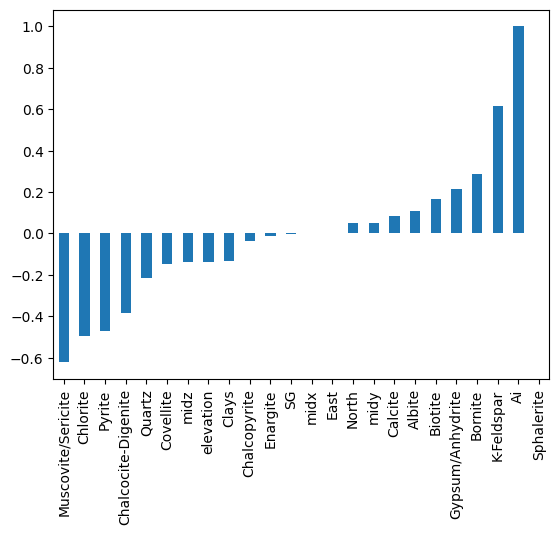

In [9]:
corr.plot.bar()

In [10]:
df_num.columns

Index(['midx', 'midy', 'midz', 'East', 'North', 'elevation',
       'Chalcocite-Digenite', 'Covellite', 'Chalcopyrite', 'Bornite', 'Pyrite',
       'Enargite', 'Sphalerite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG', 'Ai'],
      dtype='object')

In [11]:
df_lr = df_lr[['Muscovite/Sericite','Chlorite','Pyrite','Chalcocite-Digenite','Bornite','K-Feldspar','Ai']]
df_lr

Muscovite/Sericite  Chlorite  Pyrite  Chalcocite-Digenite  Bornite  \
165                7.14      1.42    2.19                 0.78     0.03   
166                8.11      2.62    2.53                 0.94     0.05   
167                4.70      2.04    2.59                 0.85     0.04   
168                4.62      2.68    1.00                 0.72     0.02   
169                6.52      2.33    0.88                 0.75     0.03   
..                  ...       ...     ...                  ...      ...   
493               15.65      0.94    0.65                 0.08     0.08   
494                5.41      1.13    0.02                 0.44     0.14   
495               11.80      1.89    0.52                 0.28     0.11   
496                8.93      0.58    1.18                 0.19     0.09   
497                6.33      1.75    0.39                 0.44     0.11   

     K-Feldspar    Ai  
165        9.80  0.21  
166        9.18  0.20  
167       12.82  0.22  
168       15.95  0.23  
169        7.02  0.22  
..          ...   ...  
493        8.09  0.22  
494       10.29  0.25  
495        6.77  0.19  
496        5.39  0.22  
497       14.70  0.27  

[327 rows x 7 columns]

In [12]:
X = df_lr.drop(['Ai'], axis=1)
y = df_lr['Ai']

### Linear regression model

In [13]:
# Instatiating linear regression model
lr = LinearRegression()

In [14]:
# Adjusting linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares
lr.fit(X, y)

LinearRegression()

In [15]:
coeff = pd.DataFrame(lr.coef_,X.columns,columns=['coefficients'])
coeff

coefficients
Muscovite/Sericite      -0.003847
Chlorite                -0.010463
Pyrite                  -0.001692
Chalcocite-Digenite     -0.050081
Bornite                 -0.034722
K-Feldspar               0.002043

In [16]:
# Prediction of Ai. Note: prediction is conducted over the same dataset!!!!!
y_pred = lr.predict(X)

# Predicted vs actual value visualization

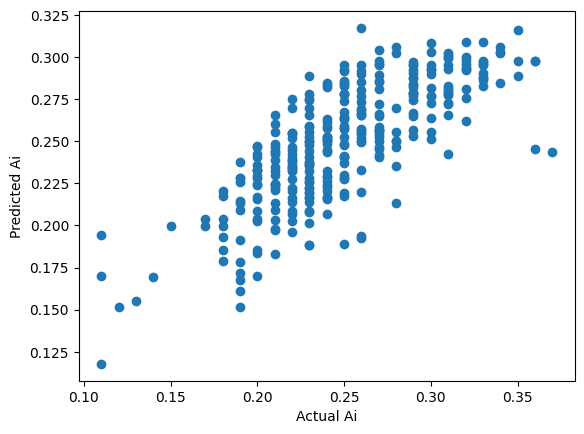

In [17]:
plt.scatter(y, y_pred)
plt.xlabel('Actual Ai')
plt.ylabel('Predicted Ai');

In [18]:
# Defining a function for error reporting
def error_report(y_test, y_pred):
    '''
    This function reports both the root mean squared error
    and the coefficient of determination for model validation
    '''
    print("Model results:")
    print("")

    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    print("RMSE test:", round(np.sqrt(mse_test),3))
    print("R2 test:", round((r2_test),3))

In [19]:
error_report(y,y_pred)

Model results:

RMSE test: 0.03
R2 test: 0.591


Note: since the model was trained and tested on the same dataset, it is expected to perform poorly when predicting new data.

***Conclusion***: The results of the model evaluation seem quite good, but

***Can we consider these results as acceptable? Why?***

This model, generated in a "traditional" way, corresponds to our baseline model. Our aim is to try to improve the results of this model, but by using a more appropriate methodology for a regression model.

# Feature engineering

## Missing data

In [20]:
df.isnull()

Sample   midx   midy   midz   East  North  elevation  \
165   False  False  False  False  False  False      False   
166   False  False  False  False  False  False      False   
167   False  False  False  False  False  False      False   
168   False  False  False  False  False  False      False   
169   False  False  False  False  False  False      False   
..      ...    ...    ...    ...    ...    ...        ...   
493   False  False  False  False  False  False      False   
494   False  False  False  False  False  False      False   
495   False  False  False  False  False  False      False   
496   False  False  False  False  False  False      False   
497   False  False  False  False  False  False      False   

     Chalcocite-Digenite  Covellite  Chalcopyrite  ...  Biotite  Chlorite  \
165                False      False         False  ...    False     False   
166                False      False         False  ...    False     False   
167                False      False         False  ...    False     False   
168                False      False         False  ...    False     False   
169                False      False         False  ...    False     False   
..                   ...        ...           ...  ...      ...       ...   
493                False      False         False  ...    False     False   
494                False      False         False  ...    False     False   
495                False      False         False  ...    False     False   
496                False      False         False  ...    False     False   
497                False      False         False  ...    False     False   

     Calcite  Gypsum/Anhydrite     SG  lithology  minzone  alteration     Ai  \
165    False             False  False      False    False       False  False   
166    False             False  False      False    False       False  False   
167    False             False  False      False    False       False  False   
168    False             False  False      False    False       False  False   
169    False             False  False      False    False       False  False   
..       ...               ...    ...        ...      ...         ...    ...   
493    False             False  False      False    False       False  False   
494    False             False  False      False    False       False  False   
495    False             False  False      False    False       False  False   
496    False             False  False      False    False       False  False   
497    False             False  False      False    False       False  False   

       GMU  
165  False  
166  False  
167  False  
168  False  
169  False  
..     ...  
493  False  
494  False  
495  False  
496  False  
497  False  

[333 rows x 29 columns]

In [21]:
is_null_sum = df.isnull().sum()
is_null_sum

Sample                 0
midx                   0
midy                   0
midz                   0
East                   0
North                  0
elevation              0
Chalcocite-Digenite    0
Covellite              0
Chalcopyrite           0
Bornite                0
Pyrite                 0
Enargite               0
Sphalerite             0
Quartz                 0
K-Feldspar             0
Albite                 0
Muscovite/Sericite     0
Clays                  0
Biotite                0
Chlorite               0
Calcite                0
Gypsum/Anhydrite       0
SG                     6
lithology              0
minzone                0
alteration             0
Ai                     0
GMU                    0
dtype: int64

In [22]:
# Visualization of null data by feature
#sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Note:**
In general, it is recommended to impute instead remove a feature when null ratio is less than 0.3.
Then, for SG will proceed to impute.

**Comment:**
Since there are missing values in the database, it is necessary to preprocess these values.

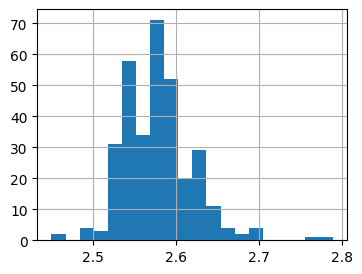

In [23]:
# SG distribution
df['SG'].hist(bins=20, figsize=(4,3));

**Comment:**
SG showing right-skewed distribution. Then, median instead mean will be imputed. 

### Median imputation

**Important note**:
    is the use of information in the model training process which would not be expected to be available at prediction time, causing the predictive scores (metrics) to overestimate the model's utility when run in a production environment (https://en.wikipedia.org/wiki/Leakage_(machine_learning)

In [24]:
# Separating dataset into train and test set (avoiding data leak)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Ai','Sample','GMU'], axis=1),
                                                           df['Ai'],
                                                           test_size=0.2,
                                                           random_state=1)
X_train.shape, X_test.shape

((266, 26), (67, 26))

In [25]:
# help(train_test_split)

In [26]:
# To perform median imputation, specify imputation strategy
imputer = MeanMedianImputer(
                imputation_method='median',
                variables=['SG'])

In [27]:
# Fitting the imputer
imputer.fit(X_train)

MeanMedianImputer(variables=['SG'])

In [28]:
# The imputer found the numerical variables to impute with the median
imputer.imputer_dict_

{'SG': 2.57}

In [29]:
# X_train has not been transformed yet
X_train['SG'].isnull().sum()

3

In [30]:
# Saving pre transformed X_train
X_train_pre = X_train['SG'] 

In [31]:
# transforming X_train. In this case, imputing the median to the dataset
X_train = imputer.transform(X_train)

In [32]:
#  Counting null after transformation. If zero, this is correct
X_train['SG'].isnull().sum()

0

In [33]:
# Saving pre transformed X_train
X_train_post = X_train['SG'] 

In [34]:
# Same processing por X_test
X_test['SG'].isnull().sum()

3

In [35]:
X_test = imputer.transform(X_test)

In [36]:
X_test['SG'].isnull().sum()

0

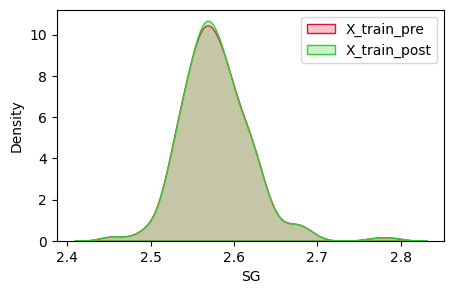

In [37]:
# Effect of median imputation on SG distribution

fig,ax = plt.subplots(figsize=(5,3))

# Original variable distribution
sns.kdeplot(data=X_train_pre, color='crimson', fill=True, label='X_train_pre')

# Original variable distribution
sns.kdeplot(data=X_train_post, color='limegreen', fill=True, label='X_train_post')

plt.legend();

**Comment:**
Distortion of original variable distribution, especially if the fraction of missing values is large. It will also produce distortion of the variance and the covariance with other variables of the dataset. In this particular case, distortion is limited.

## Categorical variables

In [38]:
# Revision of categorical features in the dataset
cat_var = df.select_dtypes(include=['object'])

In [39]:
cat_var

Sample lithology minzone alteration   GMU
165  S-166  porphyry     SSF        POT  GMU4
166  S-167  porphyry     SSF        POT  GMU4
167  S-168  porphyry     SSF        POT  GMU4
168  S-169  porphyry     SSF        POT  GMU4
169  S-170  porphyry     SSF        POT  GMU4
..     ...       ...     ...        ...   ...
493  S-494  porphyry     SSF        POT  GMU4
494  S-495  porphyry     SSF        POT  GMU4
495  S-496  porphyry     SSF        POT  GMU4
496  S-497  porphyry     SSF        POT  GMU4
497  S-498  porphyry     SSF        POT  GMU4

[333 rows x 5 columns]

**Comment:**
Since there are categorical variables in the database, it is necessary to preprocess these values.

### Categorical variables One Hot Encoding (OHE)

In [40]:
cat_var.columns

Index(['Sample', 'lithology', 'minzone', 'alteration', 'GMU'], dtype='object')

In [41]:
# Intanstiating OHE
ohe = fe_OneHotEncoder(
        top_categories=None,
        variables=['lithology', 'minzone', 'alteration'],
        drop_last=False)

In [42]:
# Fitting OHE
ohe.fit(X_train)

OneHotEncoder(variables=['lithology', 'minzone', 'alteration'])

In [43]:
# Train set transformation
X_train = ohe.transform(X_train)

In [44]:
# Test set transformation
X_test = ohe.transform(X_test)

In [45]:
X_train.head()

midx     midy     midz     East    North  elevation  \
463  1681.58  4192.42  4217.08  1681.58  4192.42    4217.08   
327  3417.49  3385.05  4219.50  3417.49  3385.05    4219.50   
340  3353.68  3378.18  4216.77  3353.68  3378.18    4216.77   
326  3417.49  3385.05  4219.50  3417.49  3385.05    4219.50   
179  1889.01  3897.15  4160.65  1889.01  3897.15    4160.65   

     Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
463             0.413281       0.05          0.88  0.073793  ...   
327             0.000000       0.00          1.33  0.000000  ...   
340             0.010000       0.00          1.84  0.010000  ...   
326             0.000000       0.00          1.61  0.010000  ...   
179             0.640000       0.02          0.47  0.030000  ...   

     Muscovite/Sericite  Clays  Biotite  Chlorite  Calcite  Gypsum/Anhydrite  \
463                5.89   0.67     5.31      2.73     0.00              0.04   
327               11.93   0.29     3.58      1.73     0.24              5.78   
340                9.98   0.28     4.39      1.77     0.00              0.02   
326               12.24   0.27     3.13      1.59     0.22              5.09   
179                9.25   0.86     6.09      1.85     0.00              0.01   

       SG  lithology_porphyry  minzone_SSF  alteration_POT  
463  2.52                   1            1               1  
327  2.68                   1            1               1  
340  2.58                   1            1               1  
326  2.67                   1            1               1  
179  2.63                   1            1               1  

[5 rows x 26 columns]

## Variable distribution and outliers

In [46]:
num_var = df.select_dtypes(exclude='object')

In [47]:
num_var.columns

Index(['midx', 'midy', 'midz', 'East', 'North', 'elevation',
       'Chalcocite-Digenite', 'Covellite', 'Chalcopyrite', 'Bornite', 'Pyrite',
       'Enargite', 'Sphalerite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG', 'Ai'],
      dtype='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10832\1506006648.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3, figsize = (15,5))


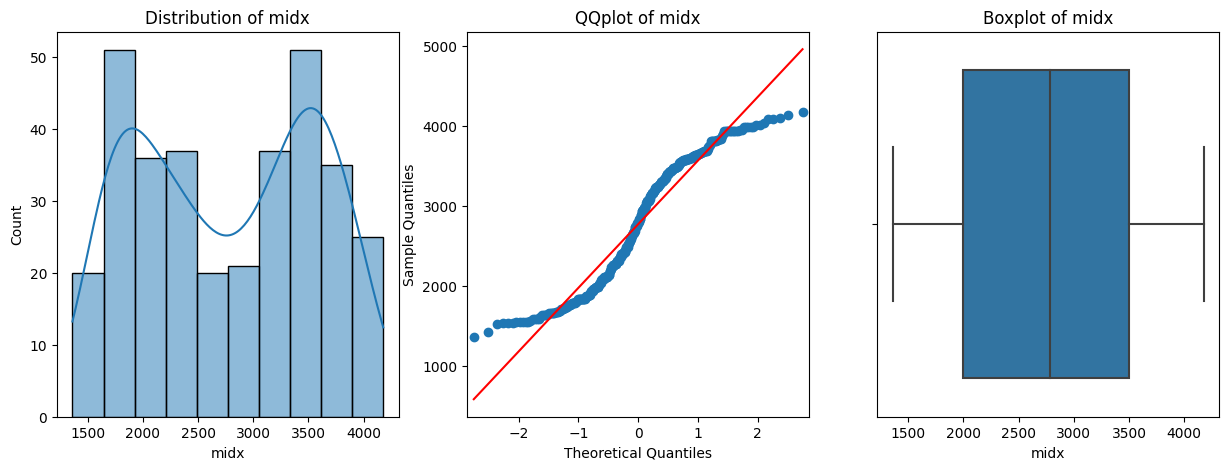

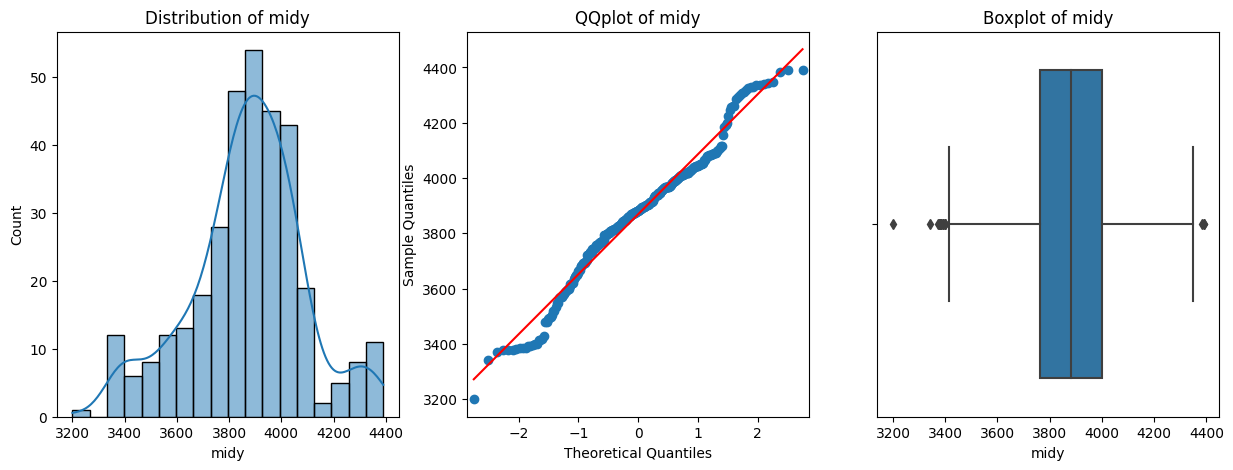

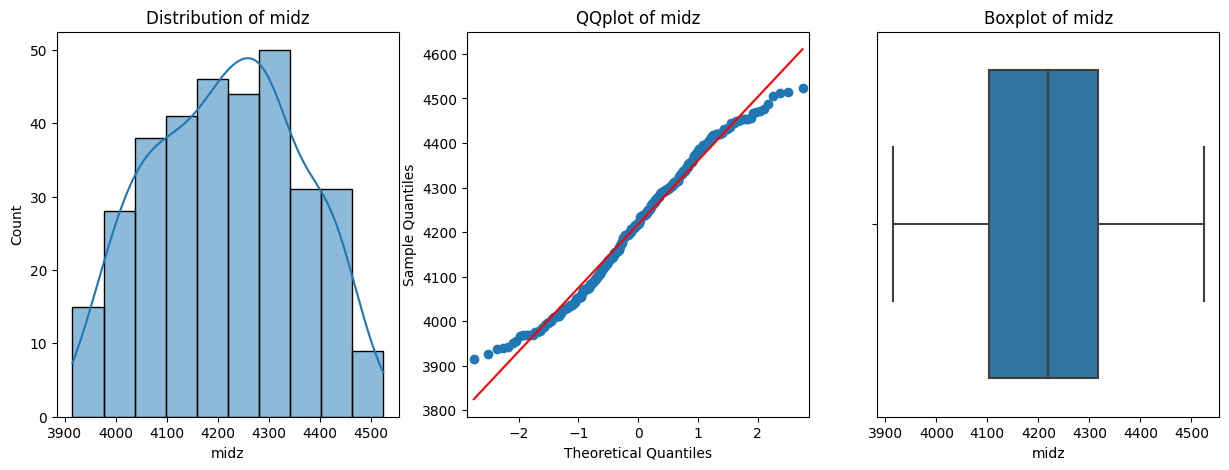

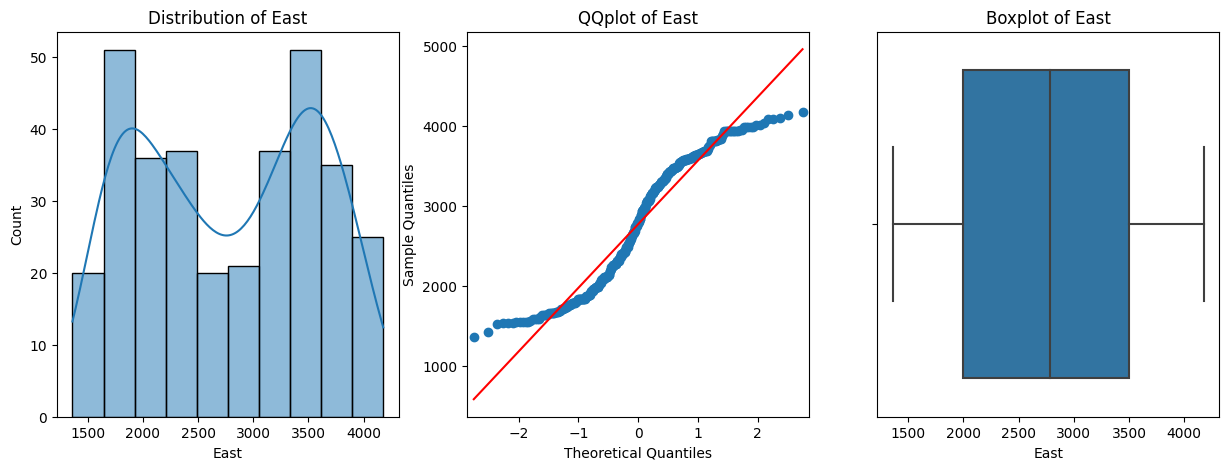

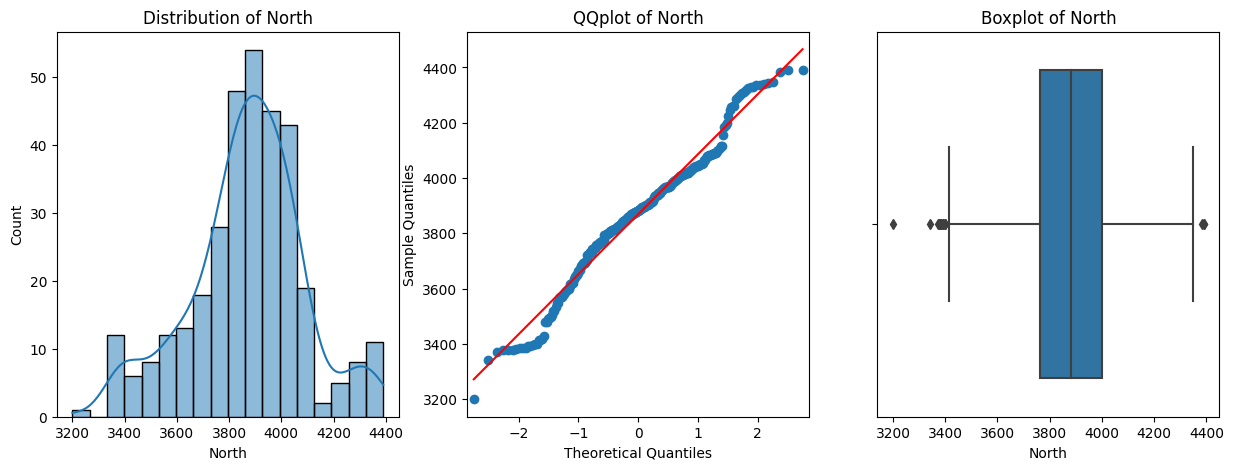

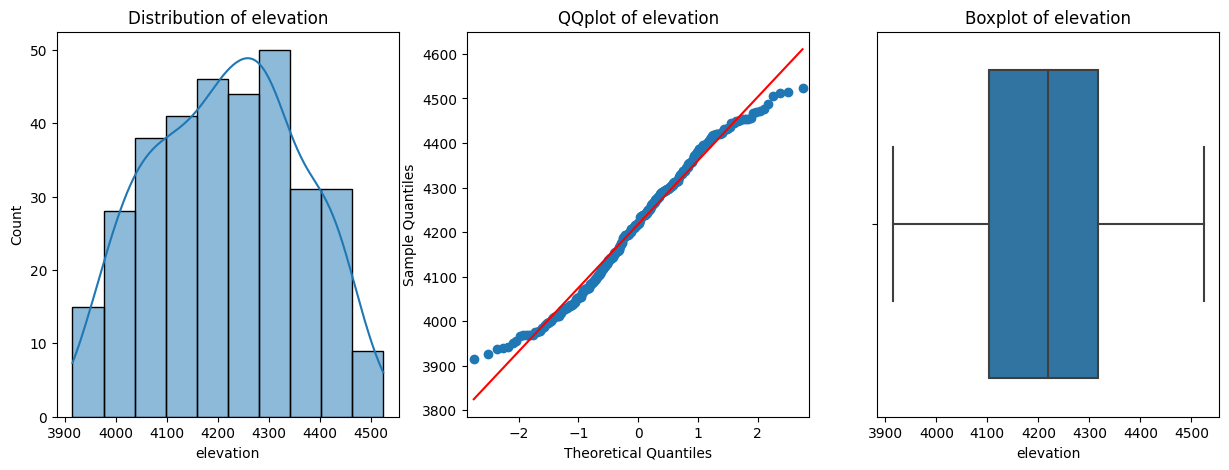

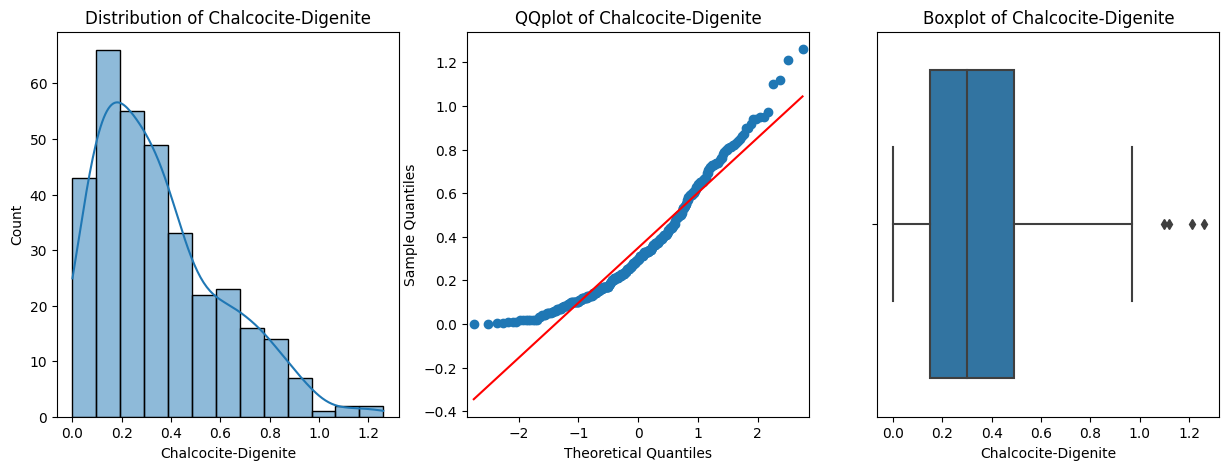

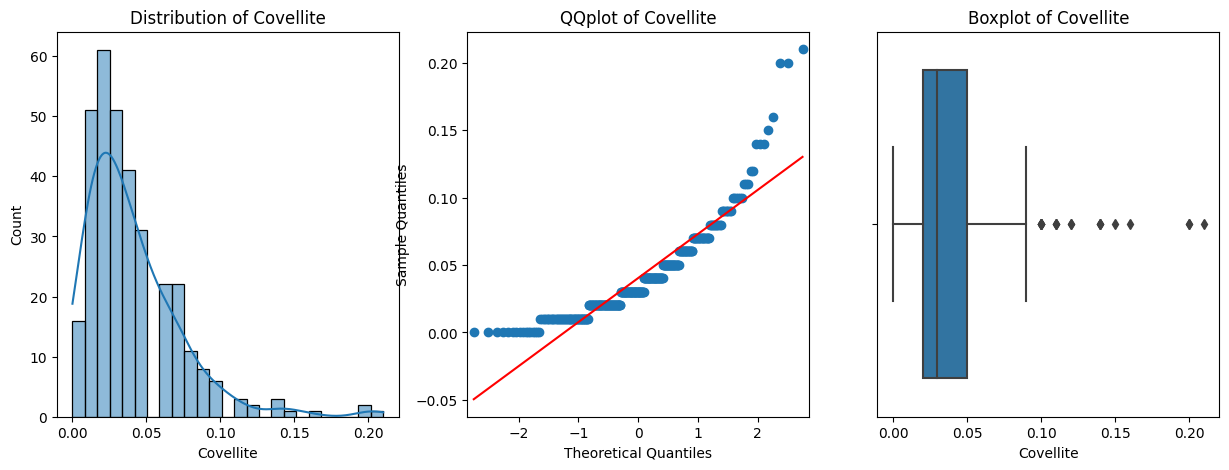

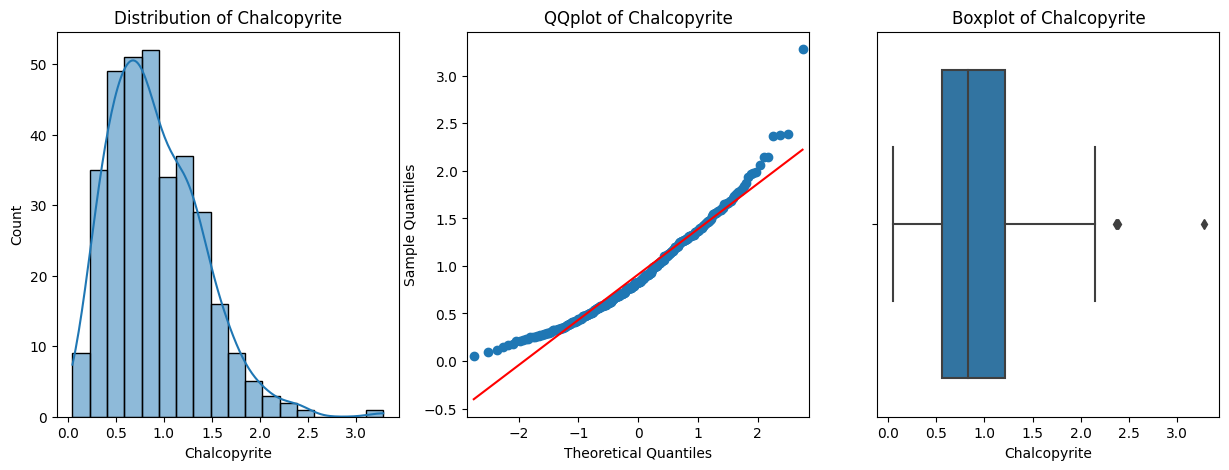

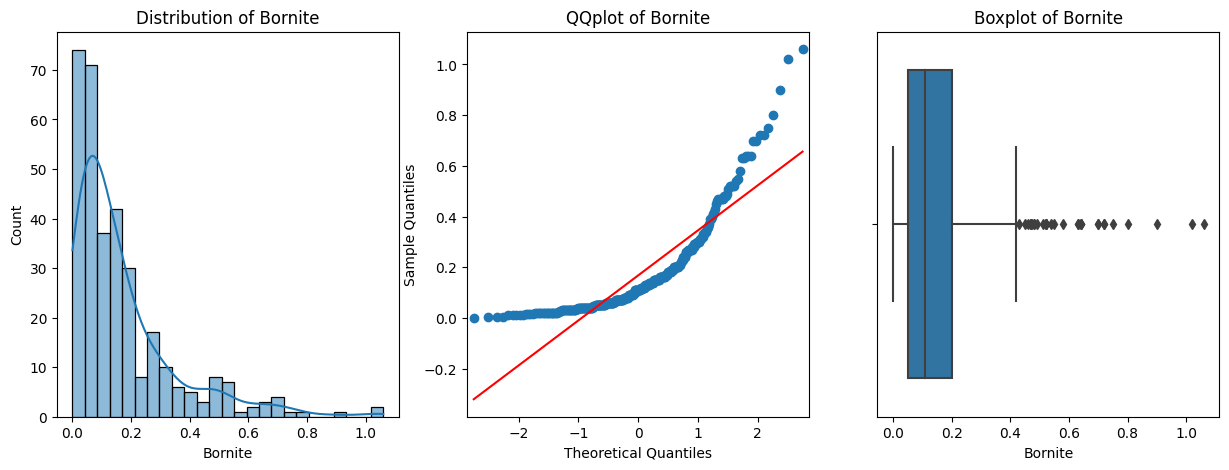

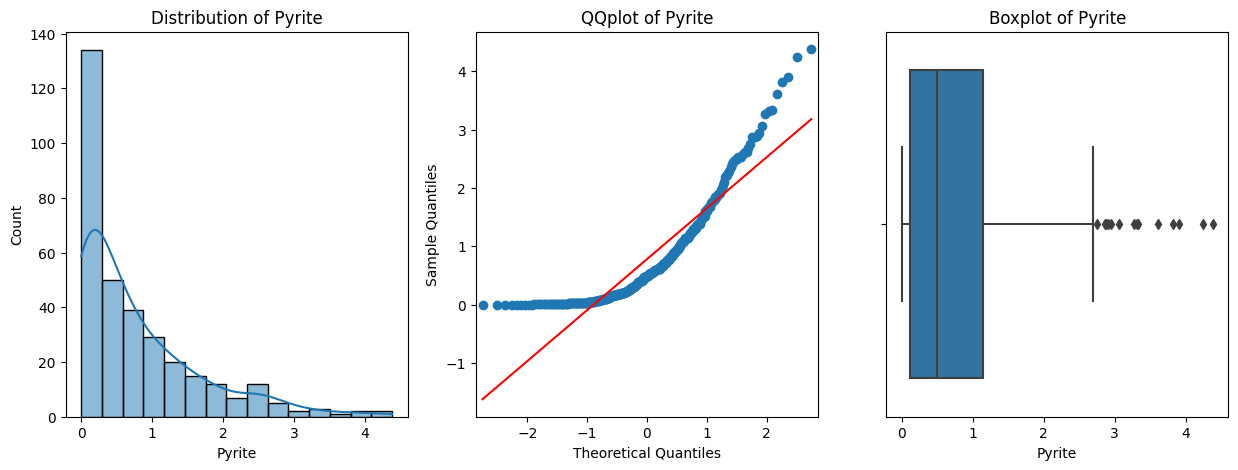

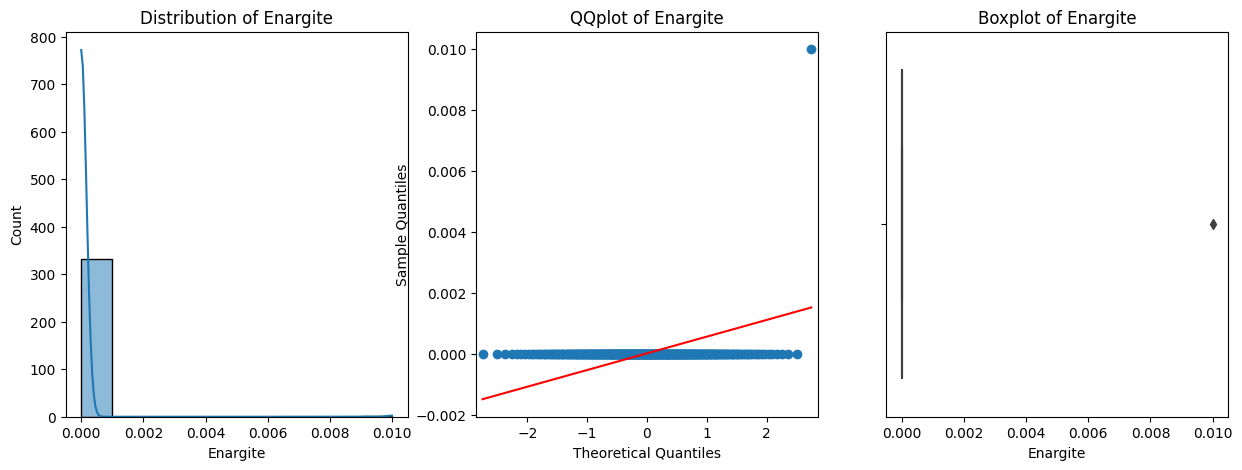

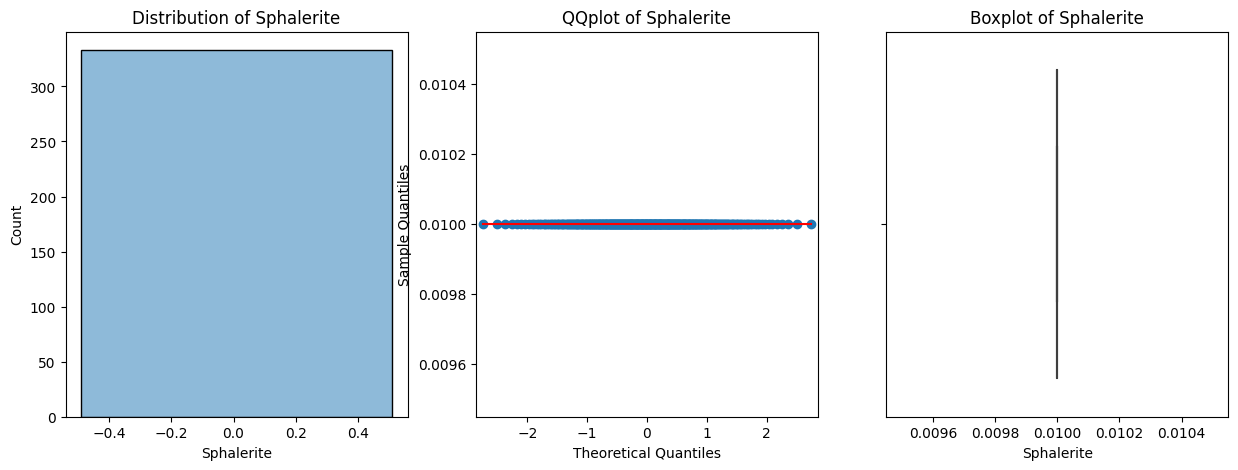

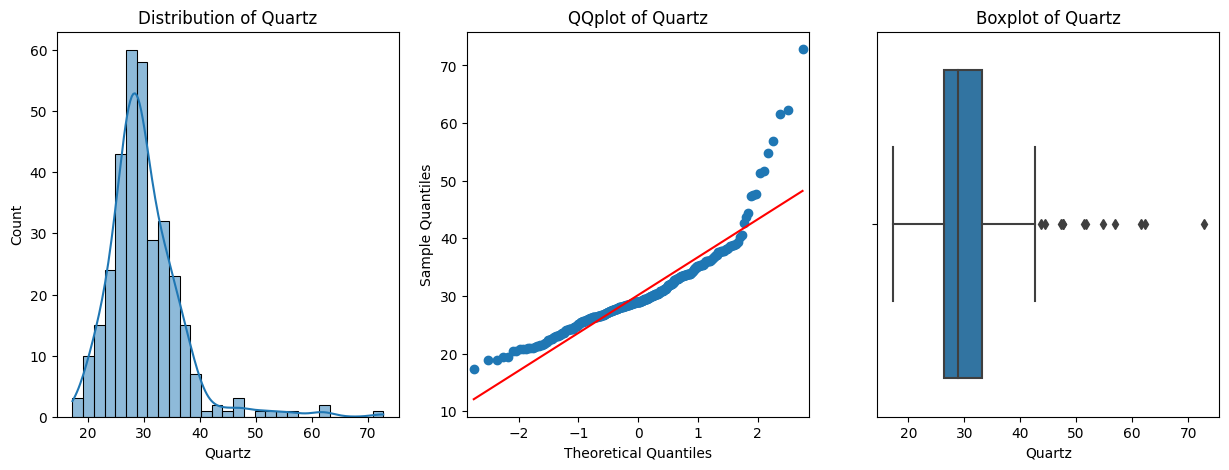

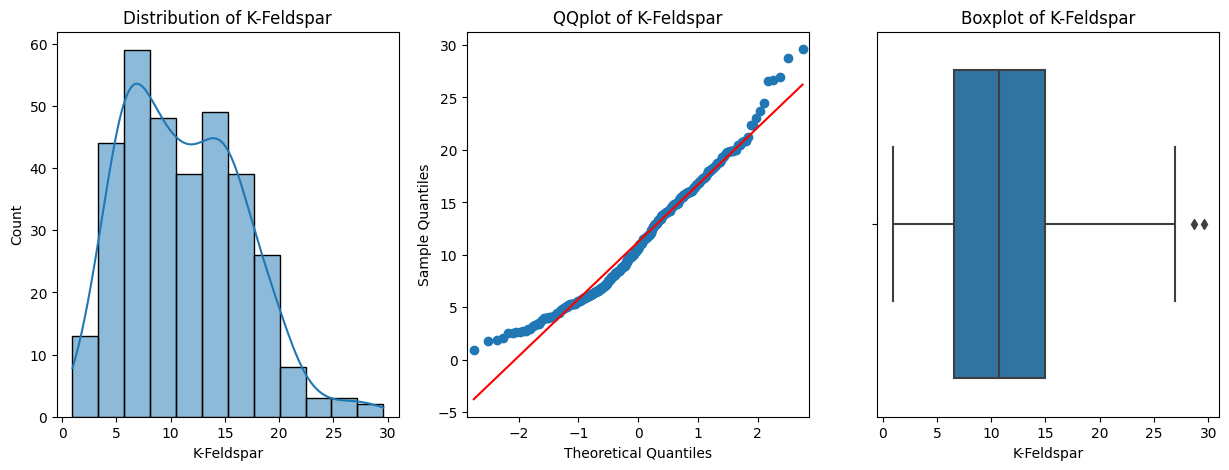

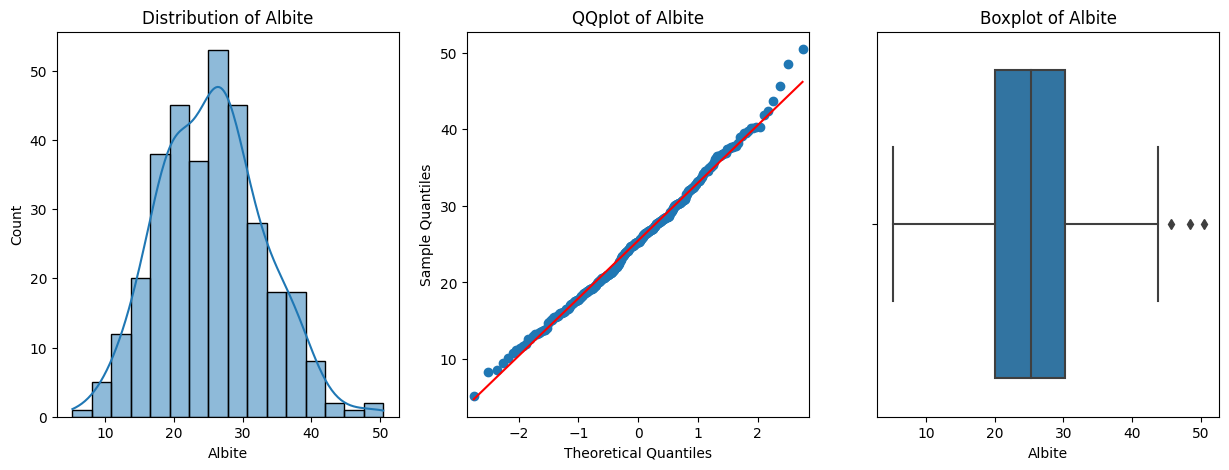

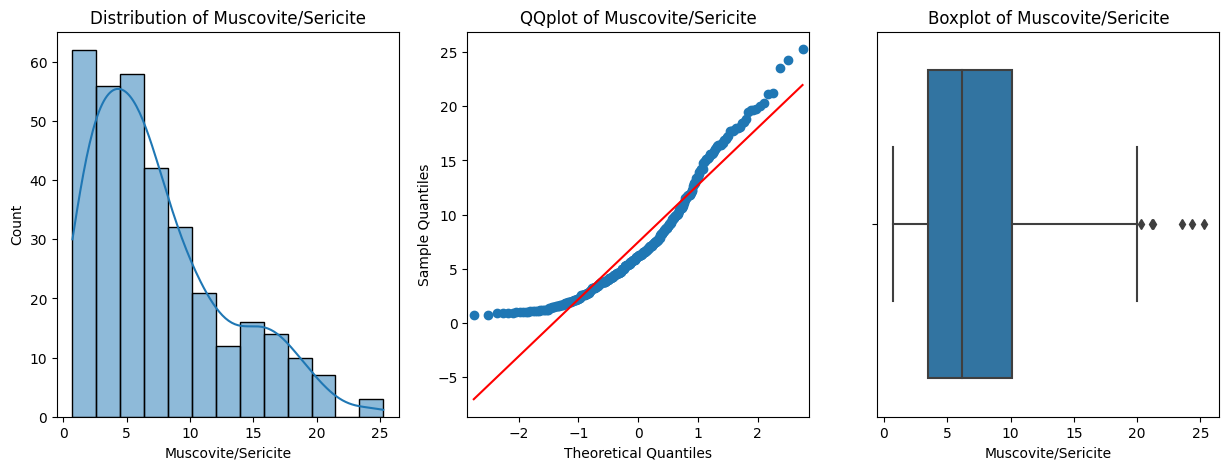

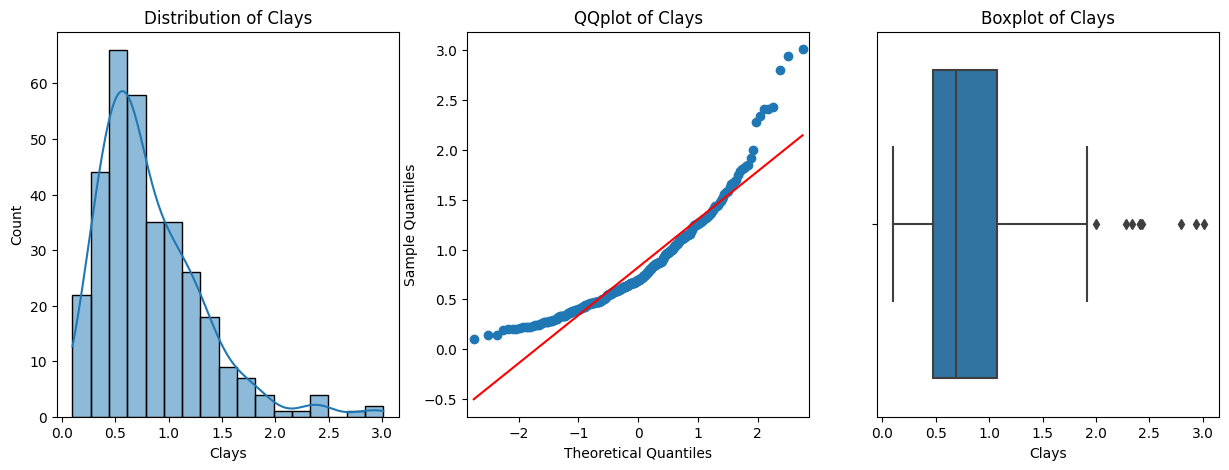

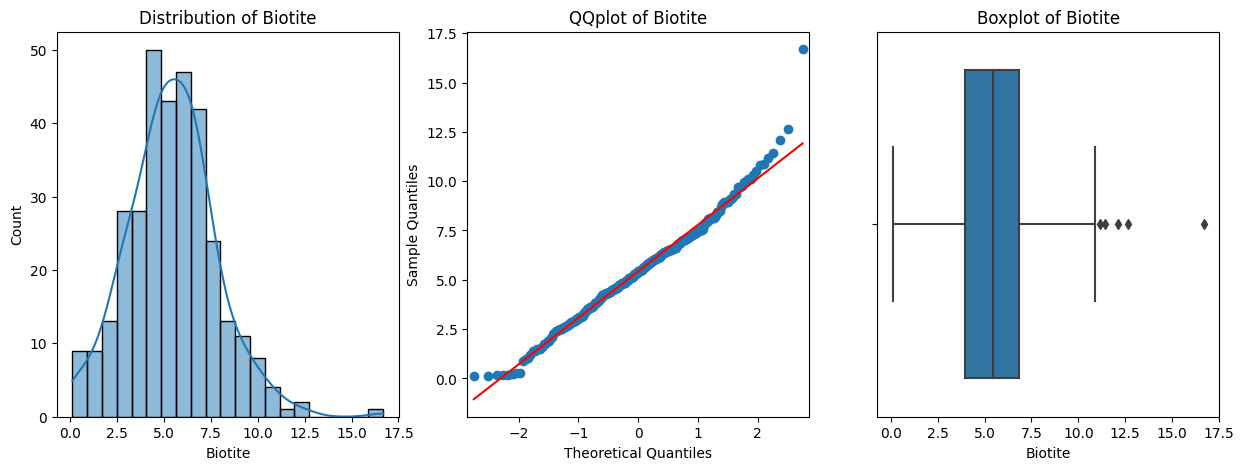

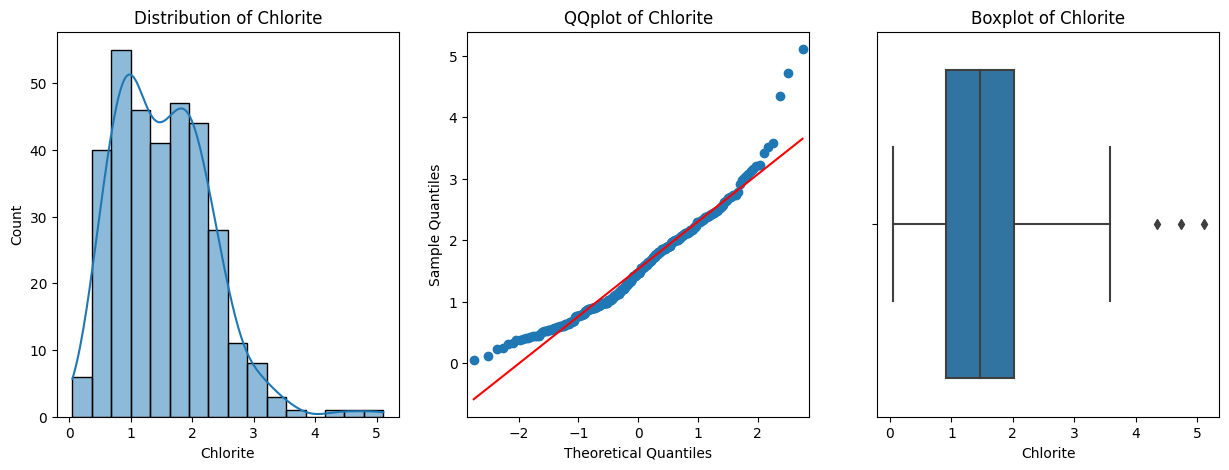

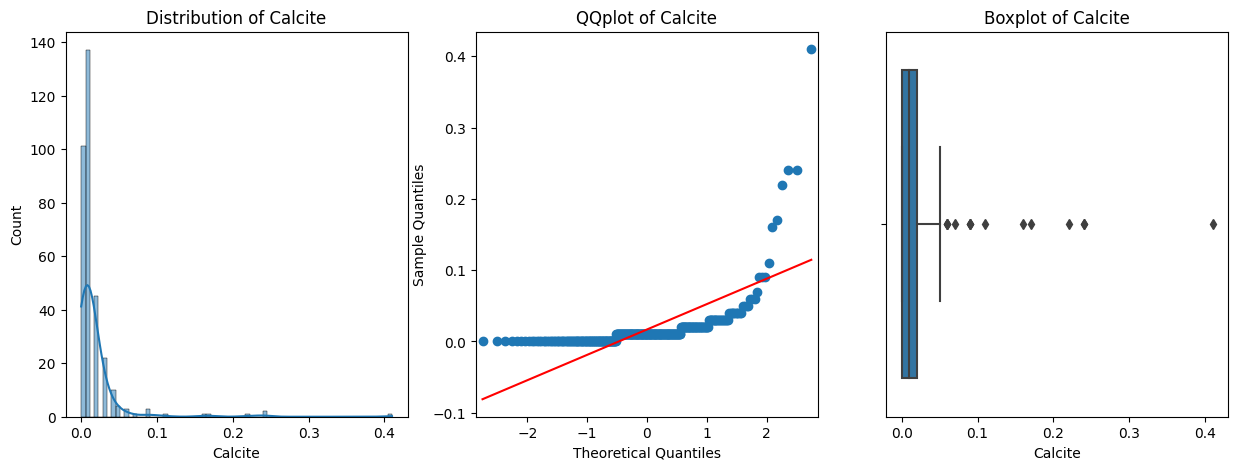

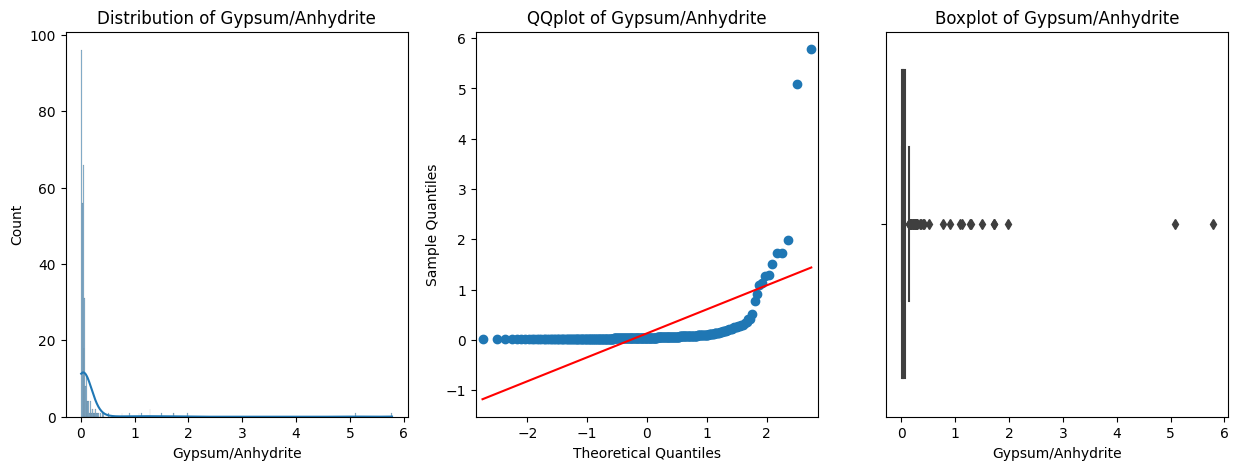

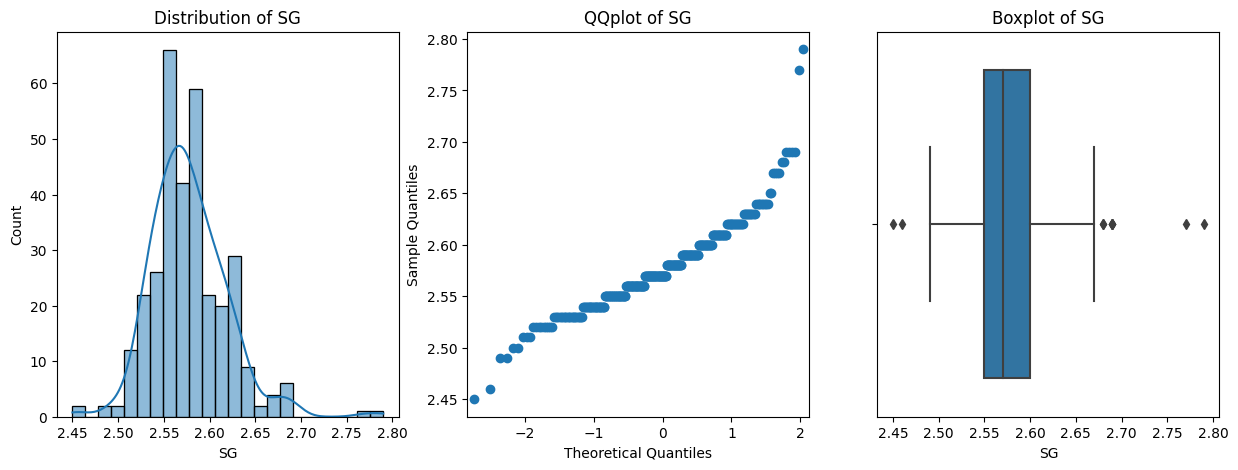

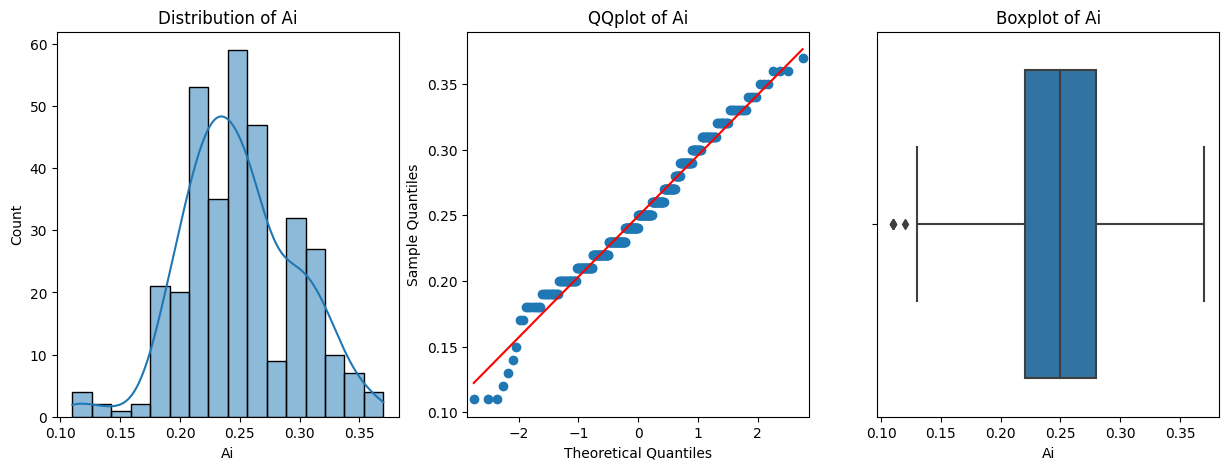

In [48]:
# Display for each feature: 
# histogram, to approximate the density
# qqplot, to have a better sense of the "gaussianity"
# boxplot, to spot outliers

for feature in num_var.columns:
    
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(x = num_var[feature], kde = True, ax = ax[0])
    
    ax[1].set_title(f"QQplot of {feature}")
    qqplot(num_var[feature], line='s', ax = ax[1])
    
    ax[2].set_title(f"Boxplot of {feature}")
    sns.boxplot(x = num_var[feature], ax = ax[2])
    


**Comment on normality:**
    most of the numerical variables, in particular Qemscan mineralogy exhibit non-normal distribution. These variables need to be transform.

### Variables tranformation

**Important note:**
The advantage of BoxCox/YeoJohnson transformation is that it provides an automated way to transform a dependent variable in a regression model so that the residuals for the model are as normal as possible.

In [49]:
num_var_list = ['midx', 'midy', 'midz', 'East', 'North', 'elevation',
       'Chalcocite-Digenite', 'Covellite', 'Chalcopyrite', 'Bornite', 'Pyrite',
       'Enargite', 'Sphalerite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG']

In [50]:
# BoxCox transformation
yjt = vt.YeoJohnsonTransformer(variables=num_var_list)

In [51]:
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['midx', 'midy', 'midz', 'East', 'North',
                                 'elevation', 'Chalcocite-Digenite',
                                 'Covellite', 'Chalcopyrite', 'Bornite',
                                 'Pyrite', 'Enargite', 'Sphalerite', 'Quartz',
                                 'K-Feldspar', 'Albite', 'Muscovite/Sericite',
                                 'Clays', 'Biotite', 'Chlorite', 'Calcite',
                                 'Gypsum/Anhydrite', 'SG'])

In [52]:
# Exponents for the Yeo-Johnson transformation
# yjt.lambda_dict_

In [53]:
# Train set transformation
X_train = yjt.transform(X_train)

In [54]:
# Test set transformation
X_test = yjt.transform(X_test)

In [55]:
num_var_tf = X_train.select_dtypes(exclude='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10832\3101864655.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3, figsize = (15,5))


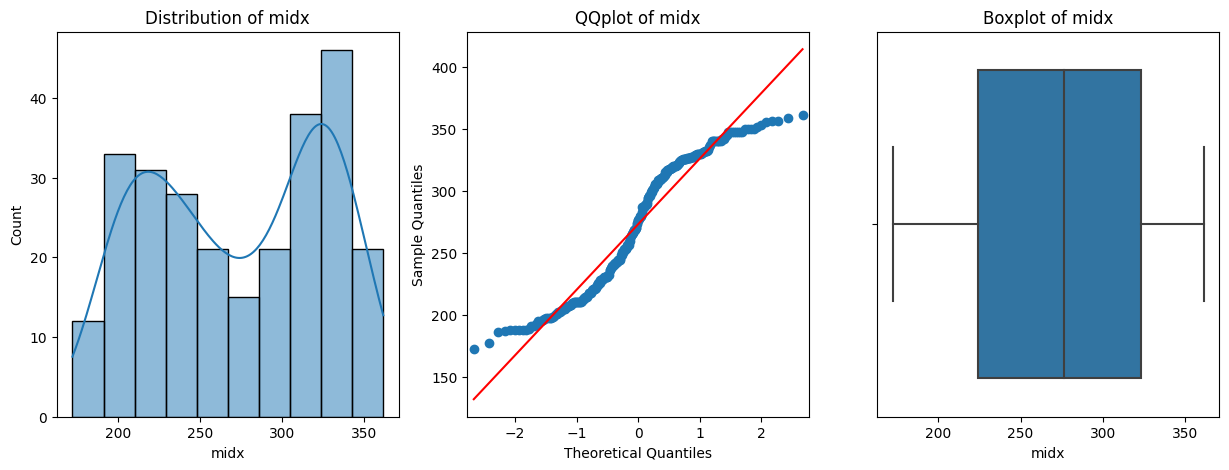

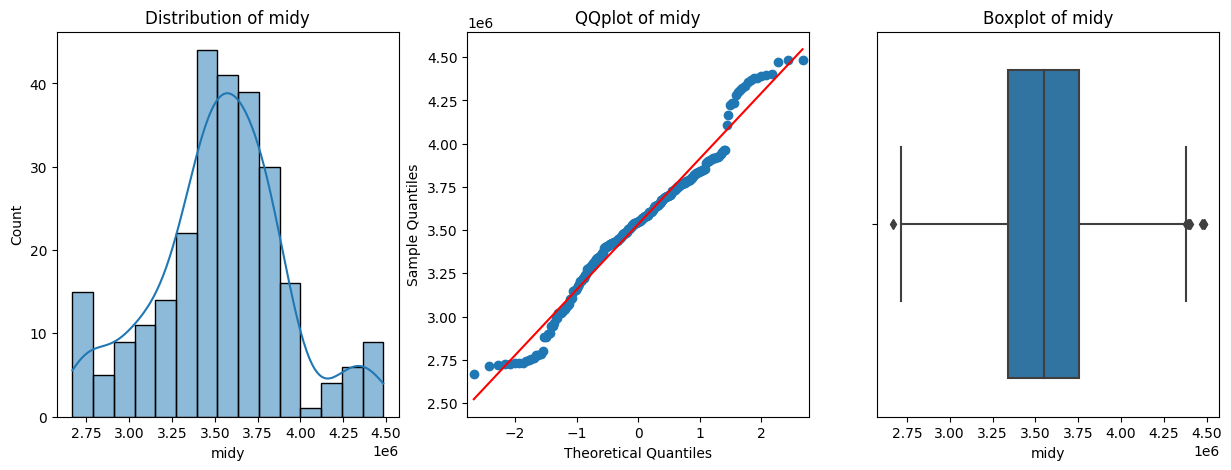

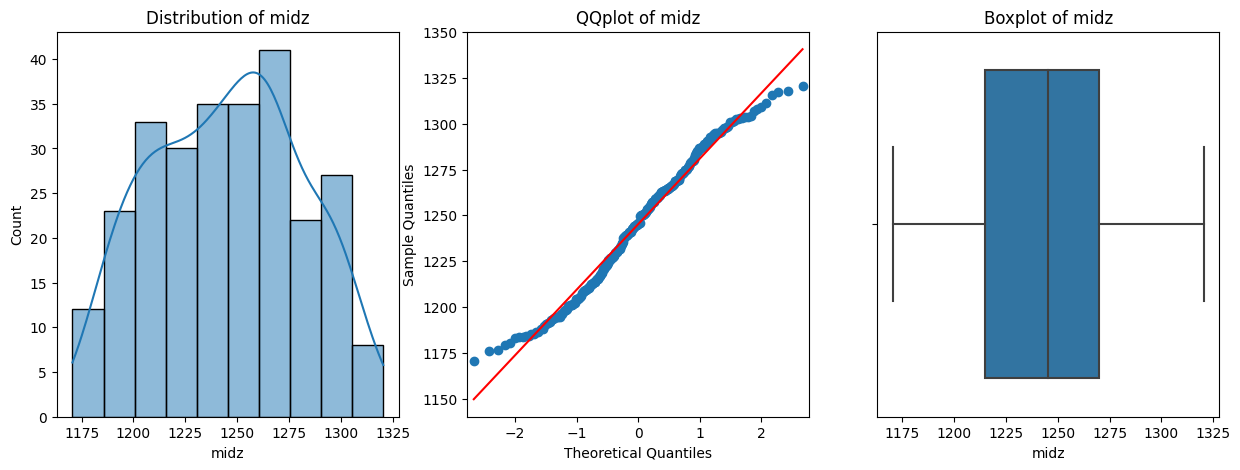

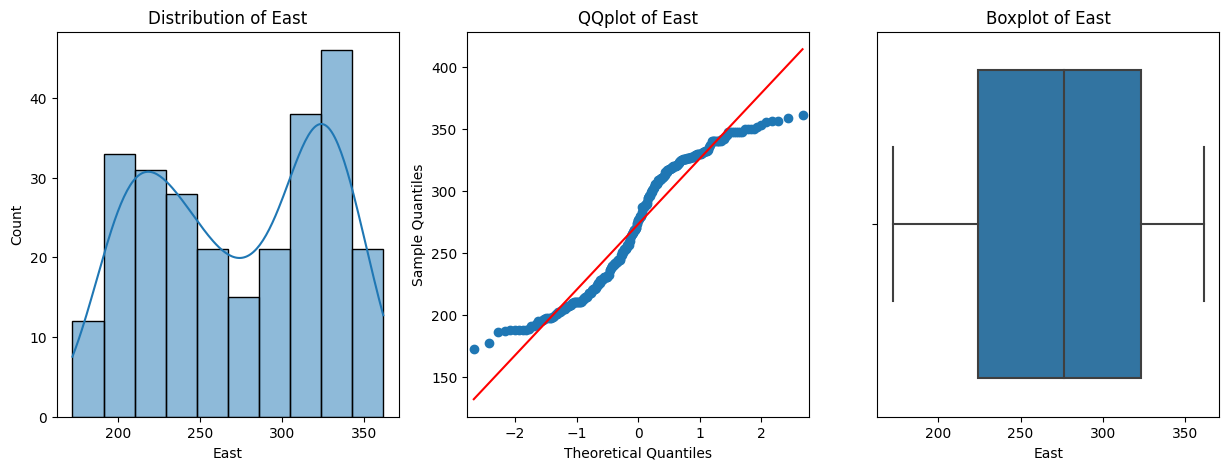

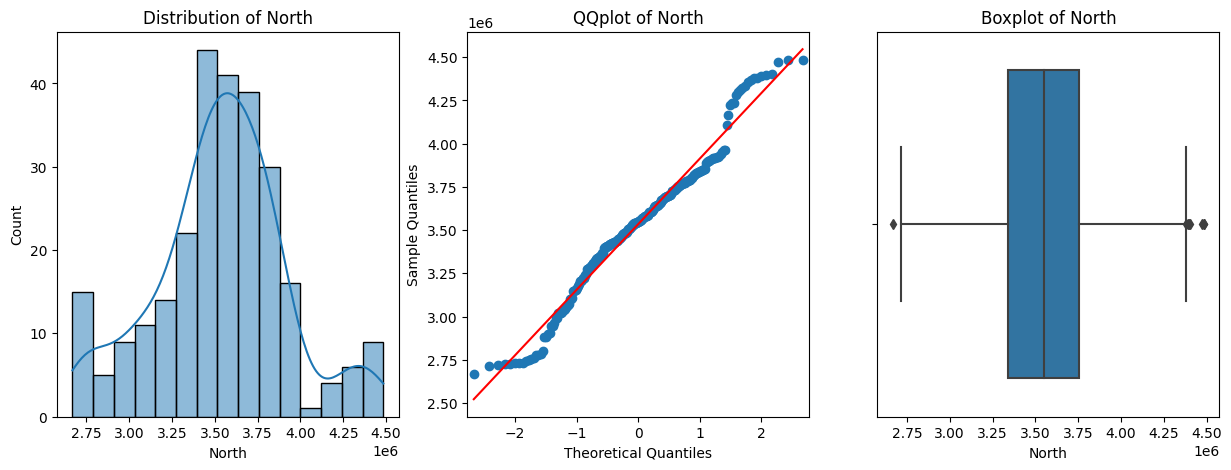

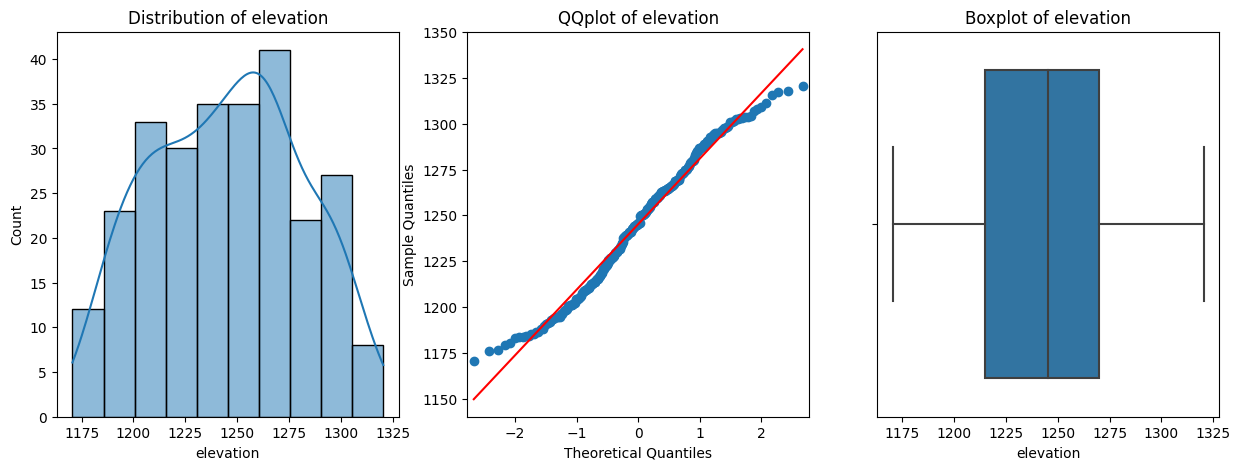

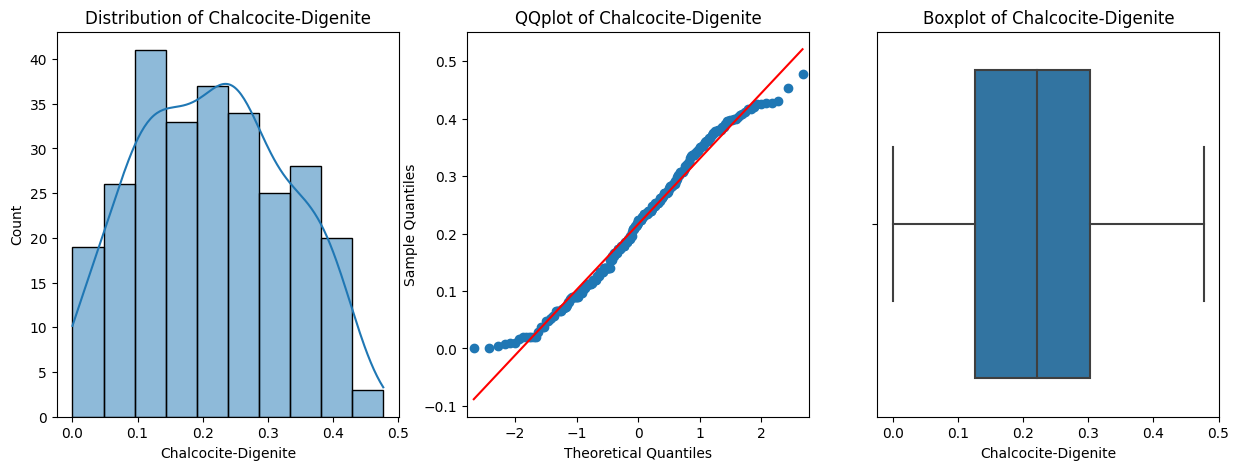

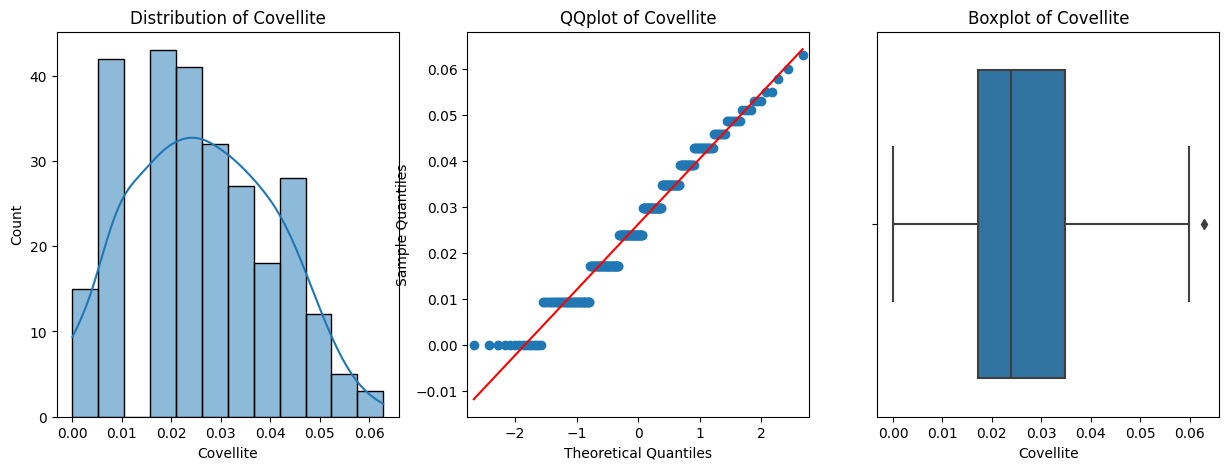

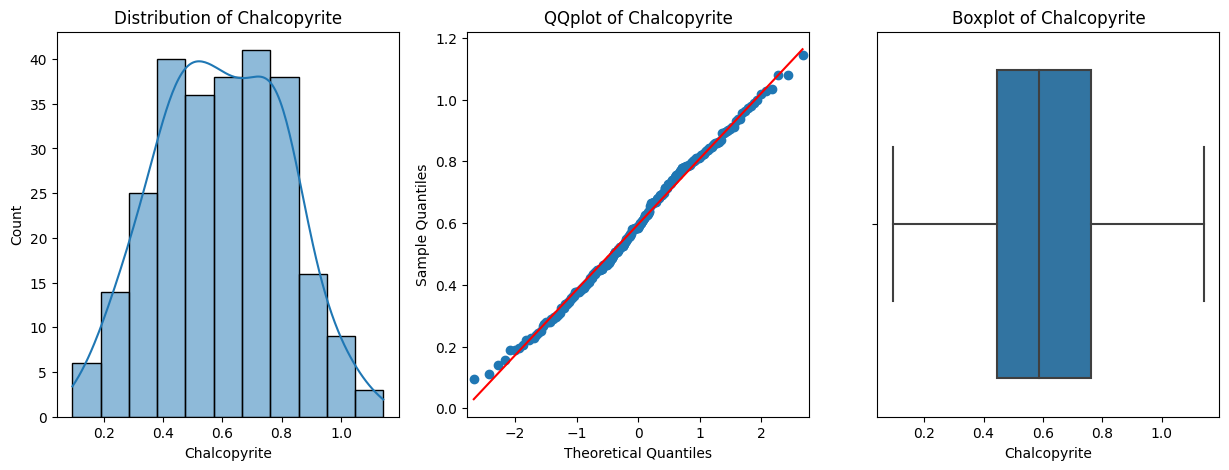

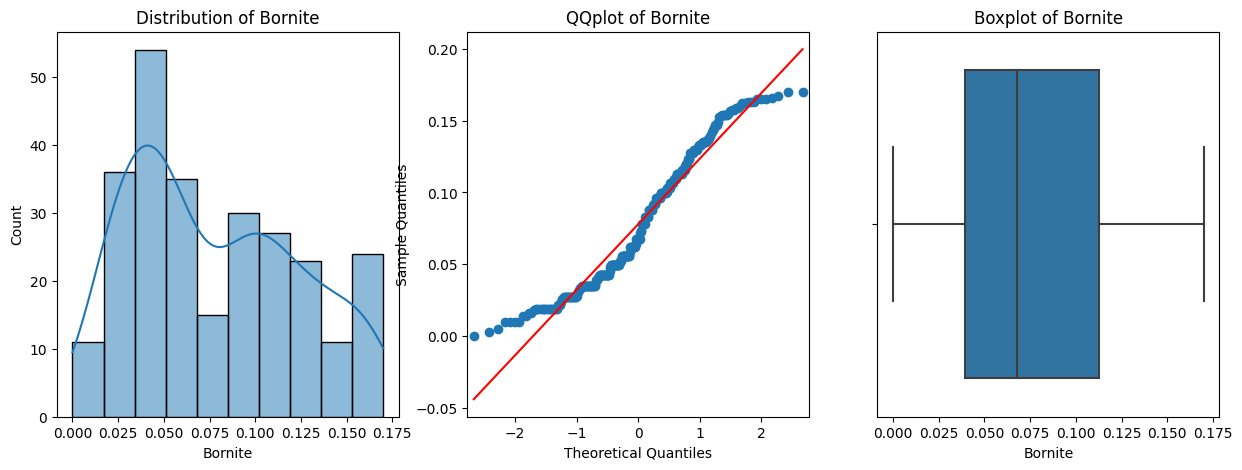

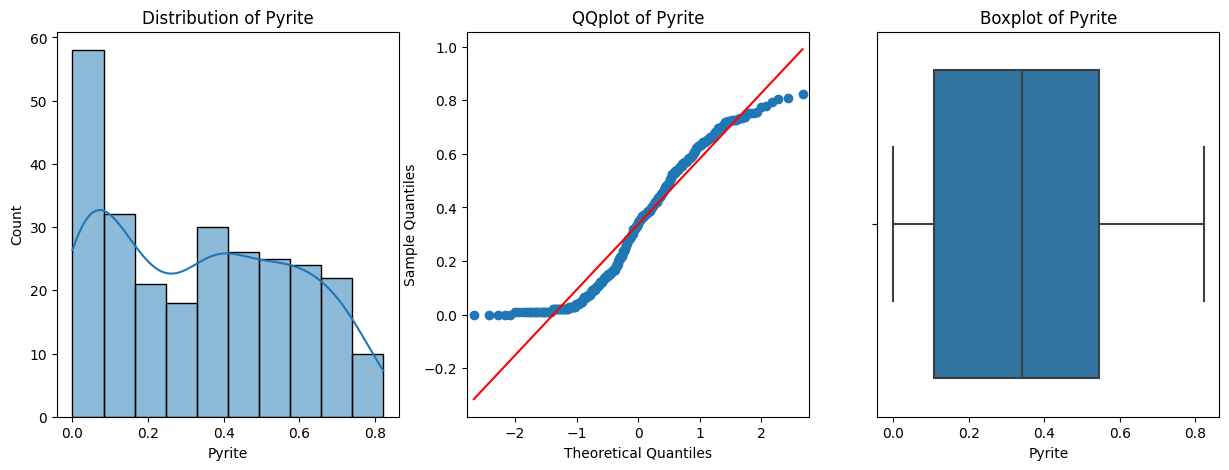

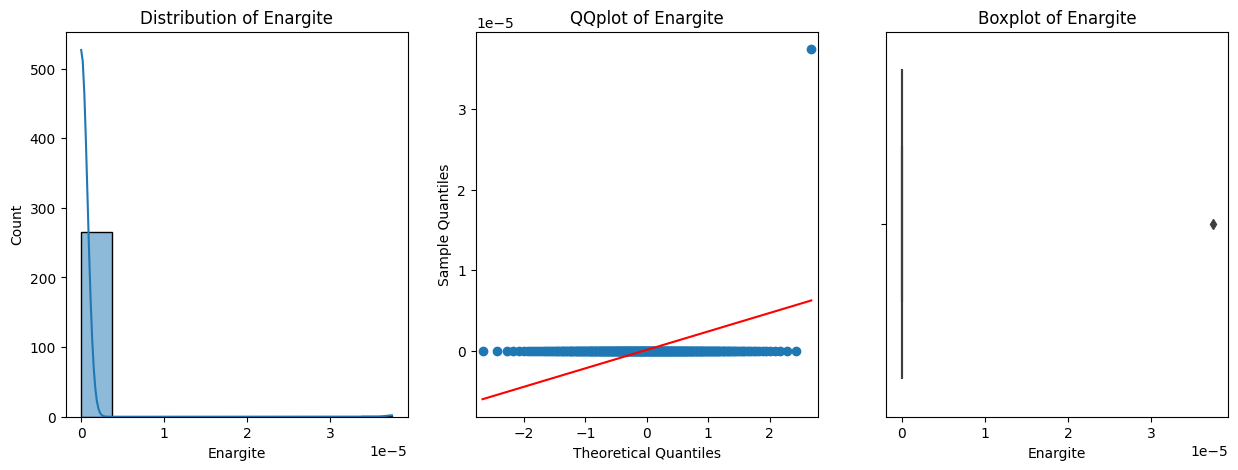

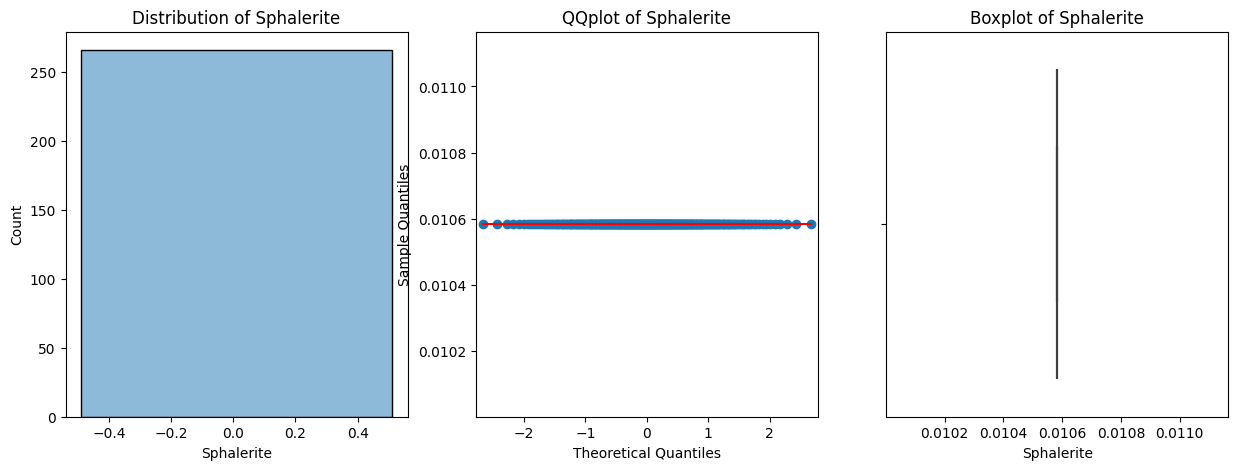

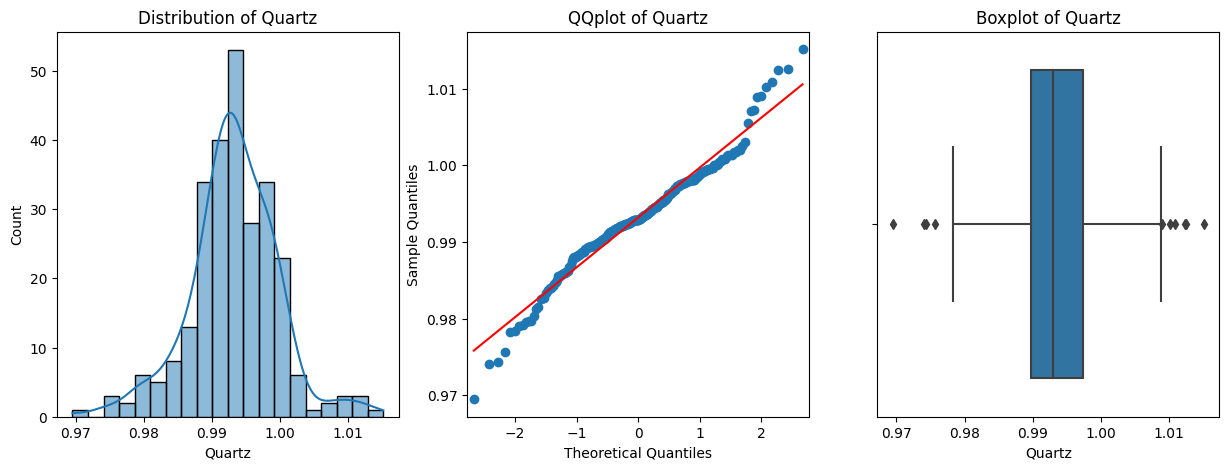

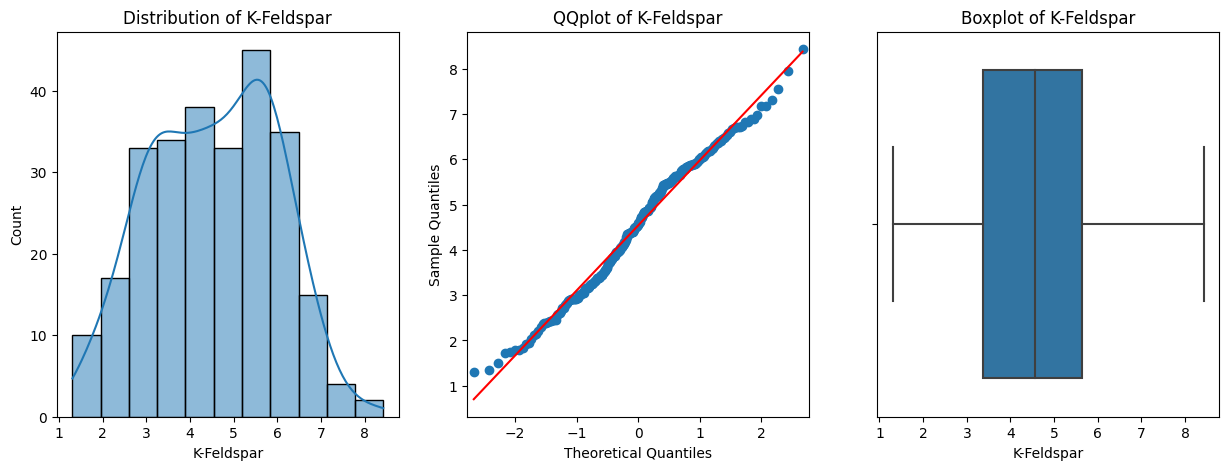

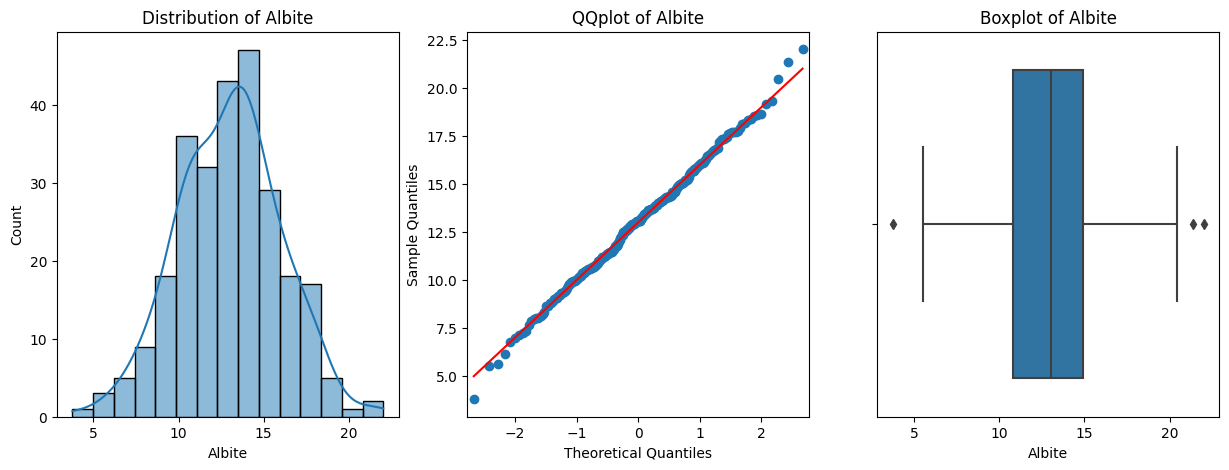

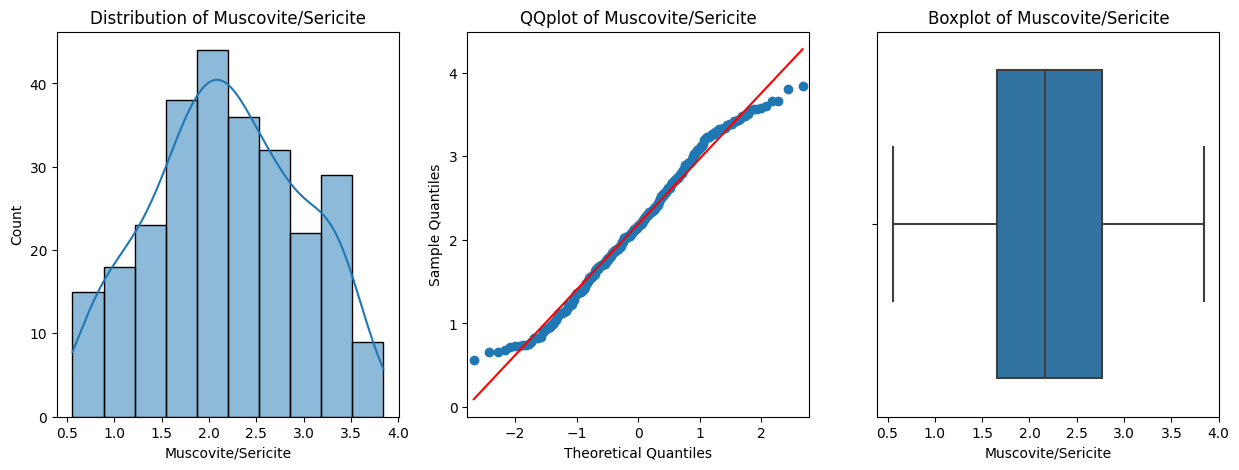

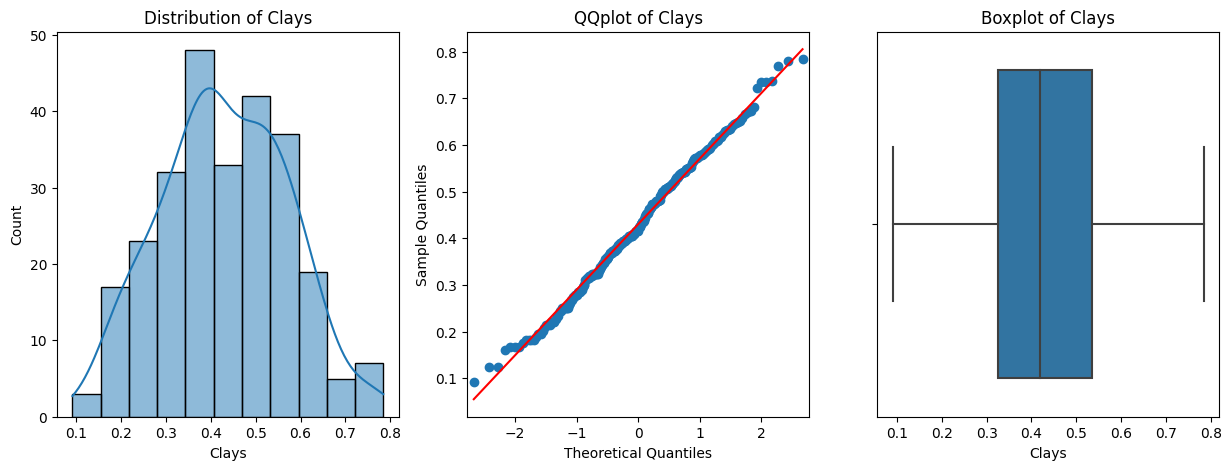

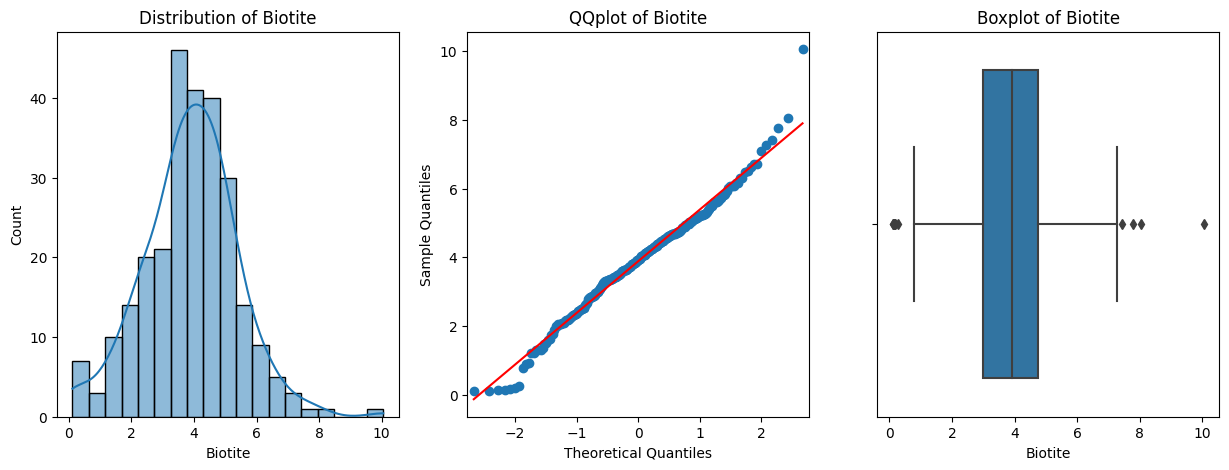

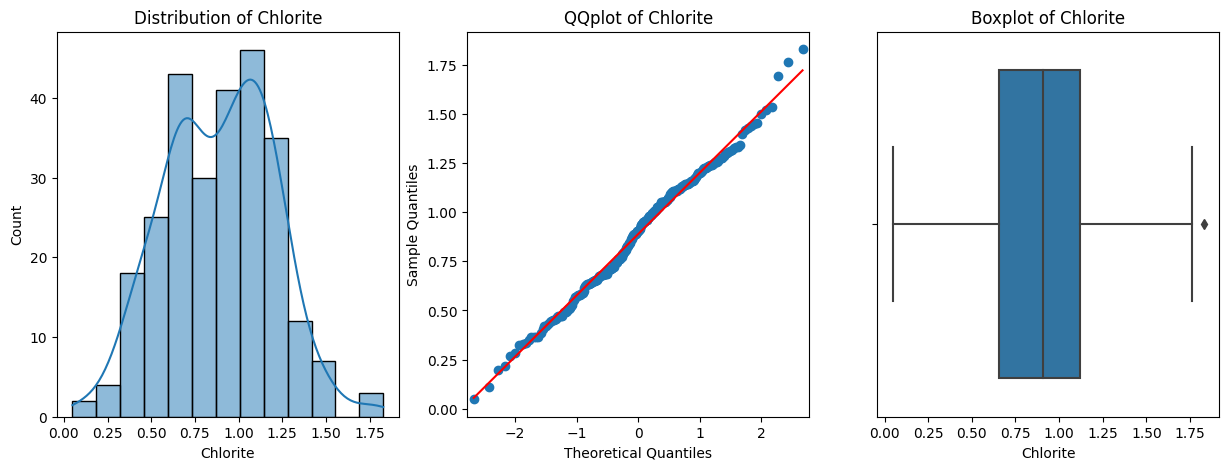

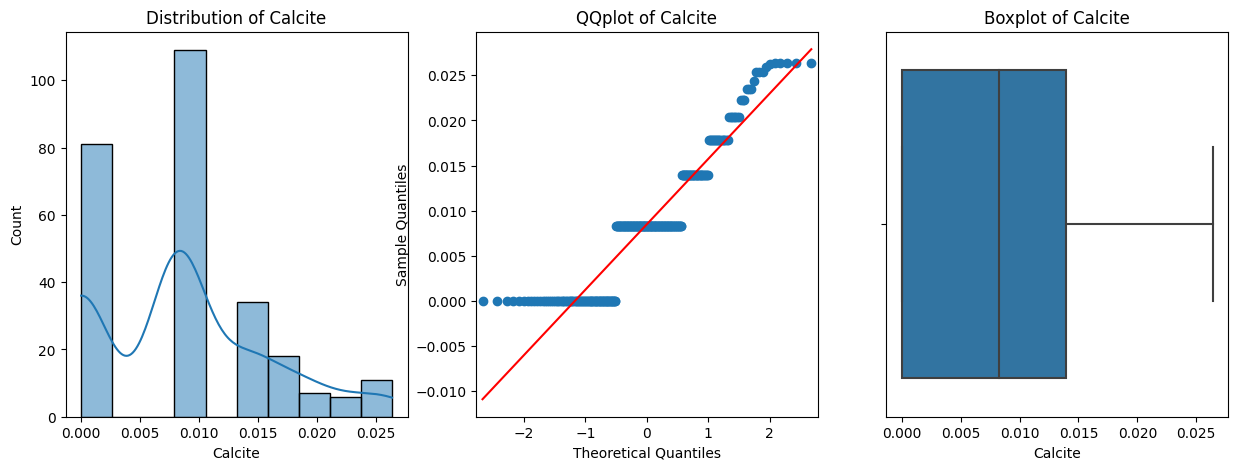

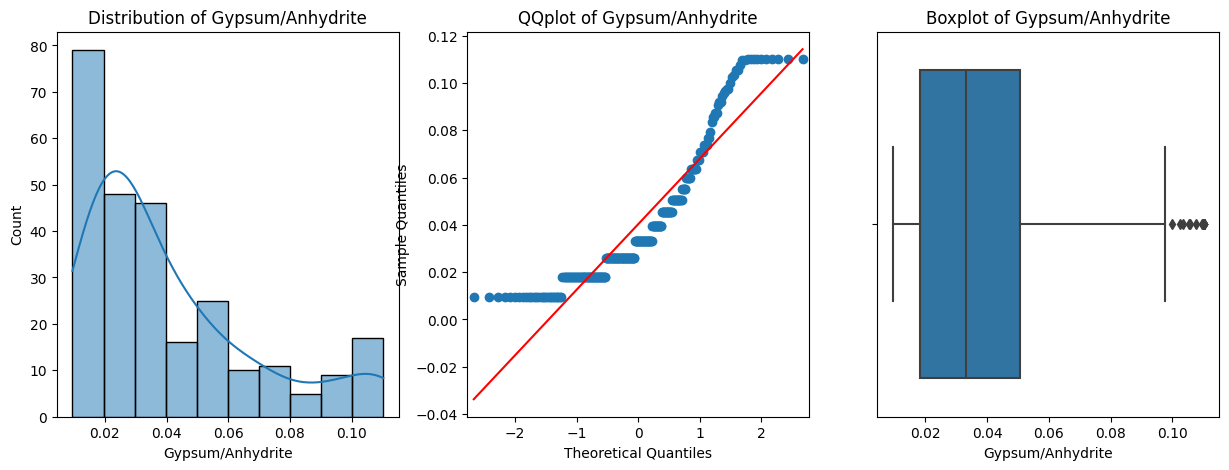

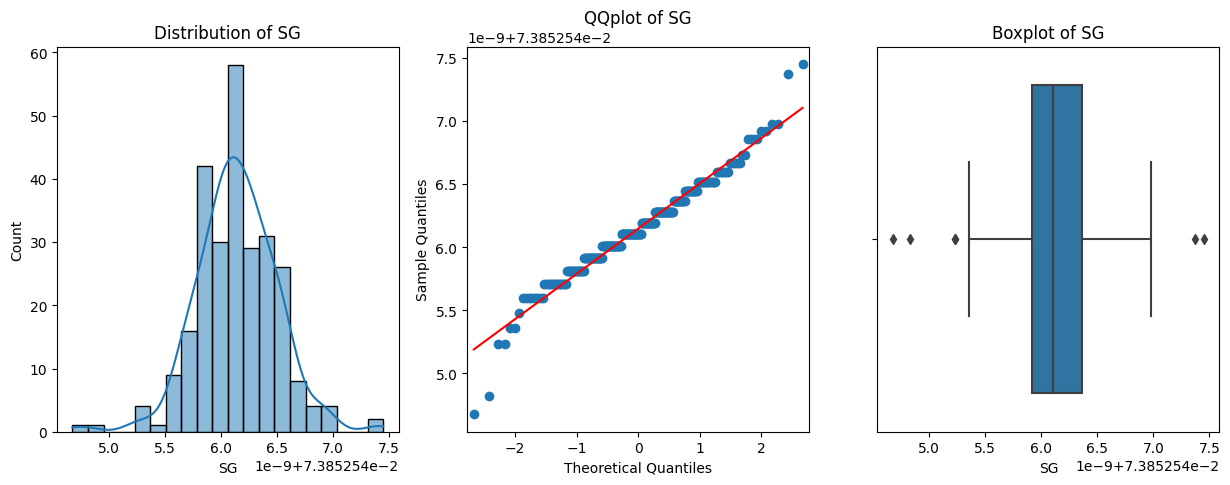

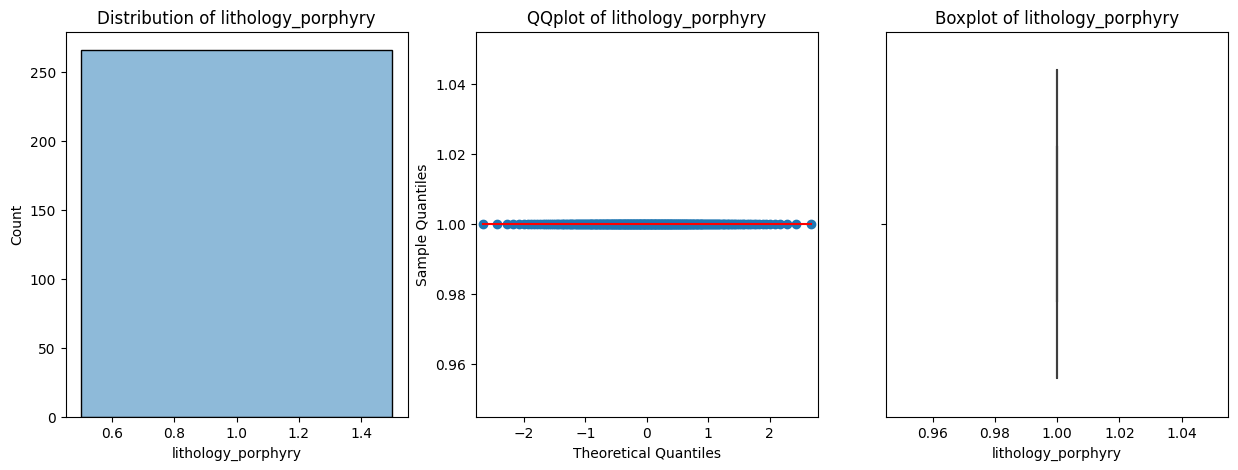

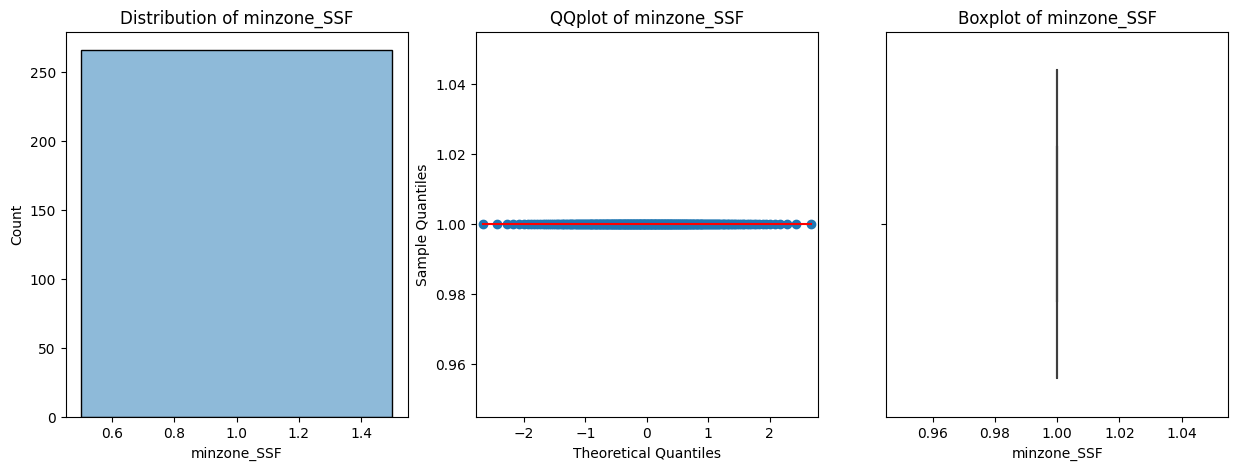

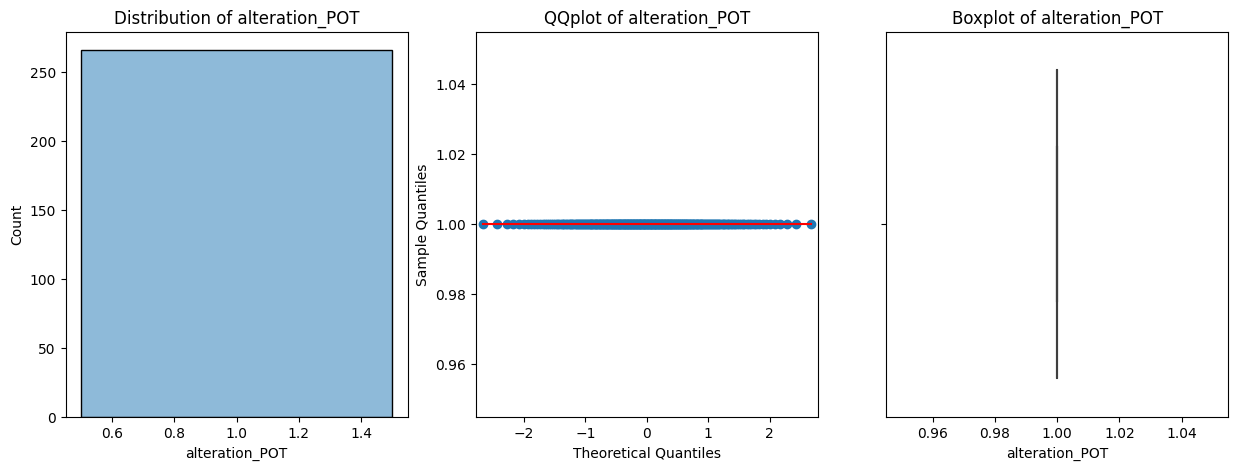

In [56]:
# Distribution of transformed variables
for feature in num_var_tf.columns:
    
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(x = num_var_tf[feature], kde = True, ax = ax[0])
    
    ax[1].set_title(f"QQplot of {feature}")
    qqplot(num_var_tf[feature], line='s', ax = ax[1])
    
        
    ax[2].set_title(f"Boxplot of {feature}")
    sns.boxplot(x = num_var_tf[feature], ax = ax[2])

**Comment on outliers:**
significant amount of numerical variables with outliers. It might affect the performance of regression models. For these variables, capping may be applied. 

In [57]:
# Variables for capping, type of tail
var_cap_both = ['midy','North','Quartz','Albite','Biotite','SG']
var_cap_right = ['Covellite','Chlorite','Gypsum/Anhydrite']

In [58]:
X_train.head()

midx          midy         midz        East         North  \
463  198.251790  4.106759e+06  1245.294060  198.251790  4.106759e+06   
327  316.633534  2.733885e+06  1245.888964  316.633534  2.733885e+06   
340  312.722312  2.723340e+06  1245.217850  312.722312  2.723340e+06   
326  316.633534  2.733885e+06  1245.888964  316.633534  2.733885e+06   
179  214.094912  3.574069e+06  1231.405643  214.094912  3.574069e+06   

       elevation  Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
463  1245.294060             0.271821   0.034713      0.610665  0.058344  ...   
327  1245.888964            -0.000000  -0.000000      0.809144 -0.000000  ...   
340  1245.217850             0.009879  -0.000000      0.988264  0.009669  ...   
326  1245.888964            -0.000000  -0.000000      0.912297  0.009669  ...   
179  1231.405643             0.352711   0.017157      0.377521  0.027167  ...   

     Muscovite/Sericite     Clays   Biotite  Chlorite   Calcite  \
463            2.138204  0.408940  3.948029  1.326231 -0.000000   
327            2.934013  0.227046  2.825536  1.010012  0.026384   
340            2.722291  0.220865  3.362567  1.024725 -0.000000   
326            2.964999  0.214591  2.516749  0.956785  0.026377   
179            2.634263  0.472982  4.427381  1.053530 -0.000000   

     Gypsum/Anhydrite        SG  lithology_porphyry  minzone_SSF  \
463          0.033002  0.073853                   1            1   
327          0.110222  0.073853                   1            1   
340          0.018126  0.073853                   1            1   
326          0.110222  0.073853                   1            1   
179          0.009514  0.073853                   1            1   

     alteration_POT  
463               1  
327               1  
340               1  
326               1  
179               1  

[5 rows x 26 columns]

### Outlier removing

In [59]:
pipe = Pipeline([
    ('Windsorizer_both', Winsorizer(capping_method='quantiles',
                                   tail='both',
                                   fold=0.01,
                                   variables=var_cap_both)),
    
    ('Windsorizer_right', Winsorizer(capping_method='quantiles',
                                   tail='right',
                                   fold=0.01,
                                   variables=var_cap_right))
          
])

In [60]:
pipe.fit(X_train)

Pipeline(steps=[('Windsorizer_both',
                 Winsorizer(capping_method='quantiles', fold=0.01, tail='both',
                            variables=['midy', 'North', 'Quartz', 'Albite',
                                       'Biotite', 'SG'])),
                ('Windsorizer_right',
                 Winsorizer(capping_method='quantiles', fold=0.01,
                            variables=['Covellite', 'Chlorite',
                                       'Gypsum/Anhydrite']))])

In [61]:
# Train set transformation
X_train = pipe.transform(X_train)

In [62]:
# Test set transformation
X_test = pipe.transform(X_test)

In [63]:
num_var_tf = X_train.select_dtypes(exclude='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_10832\3101864655.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,3, figsize = (15,5))


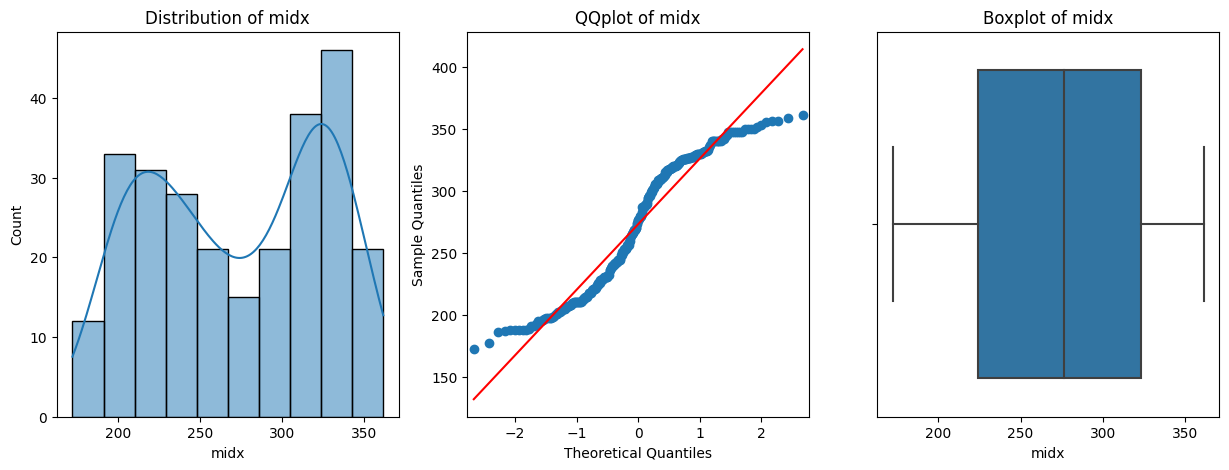

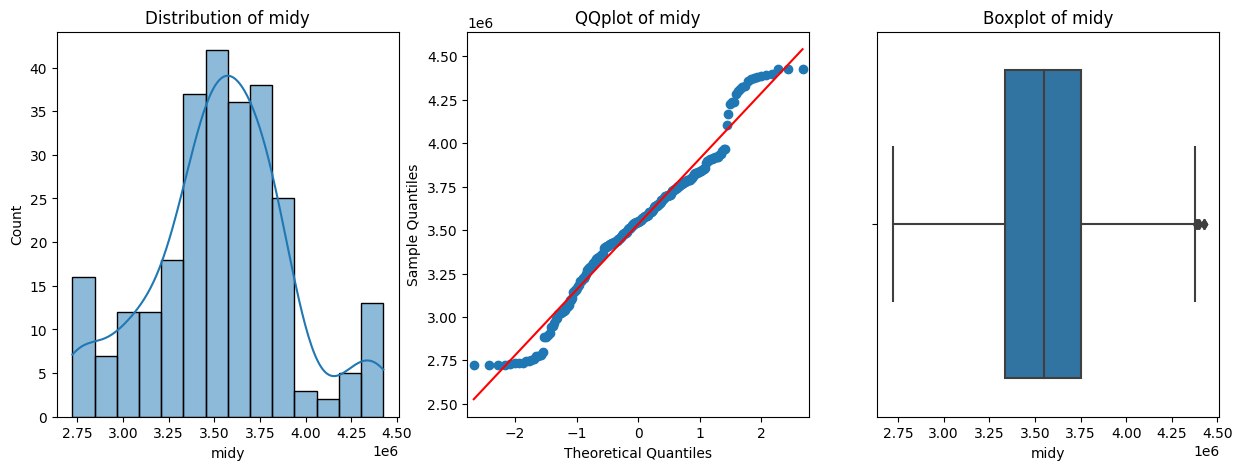

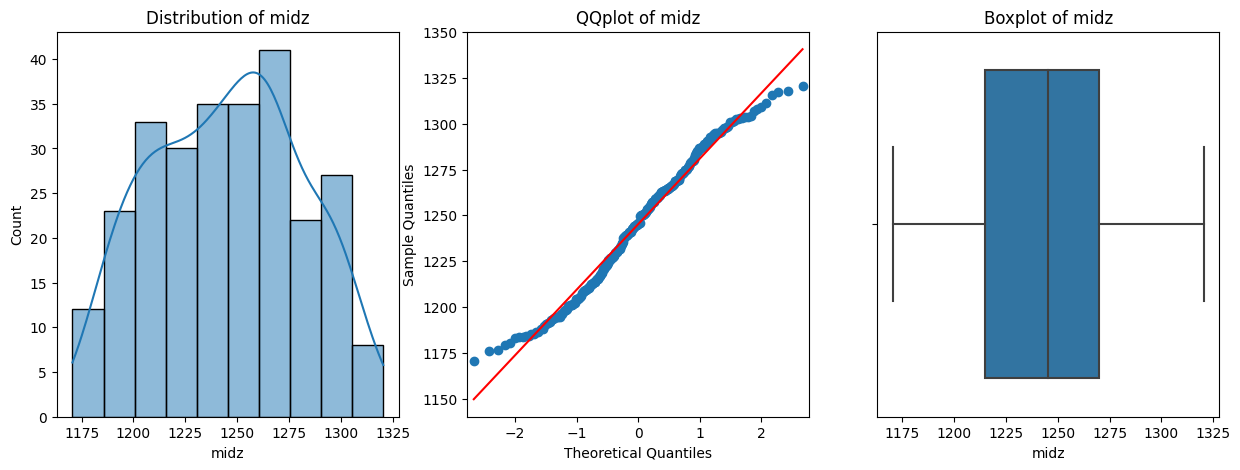

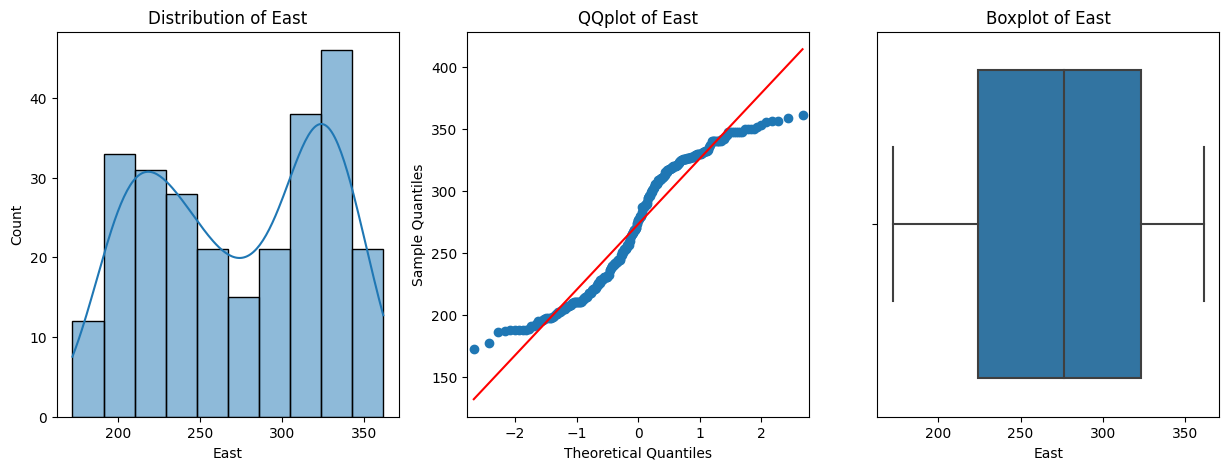

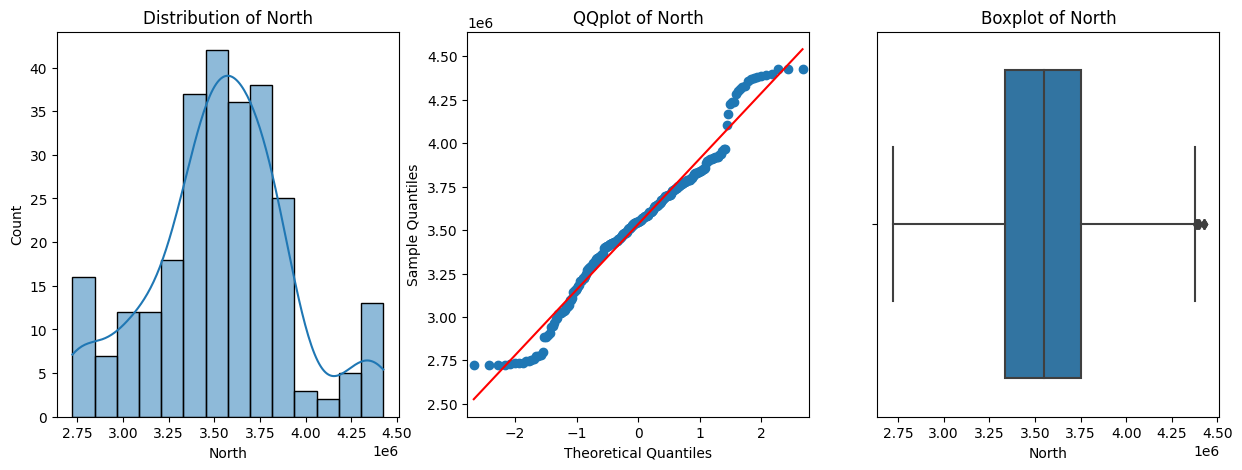

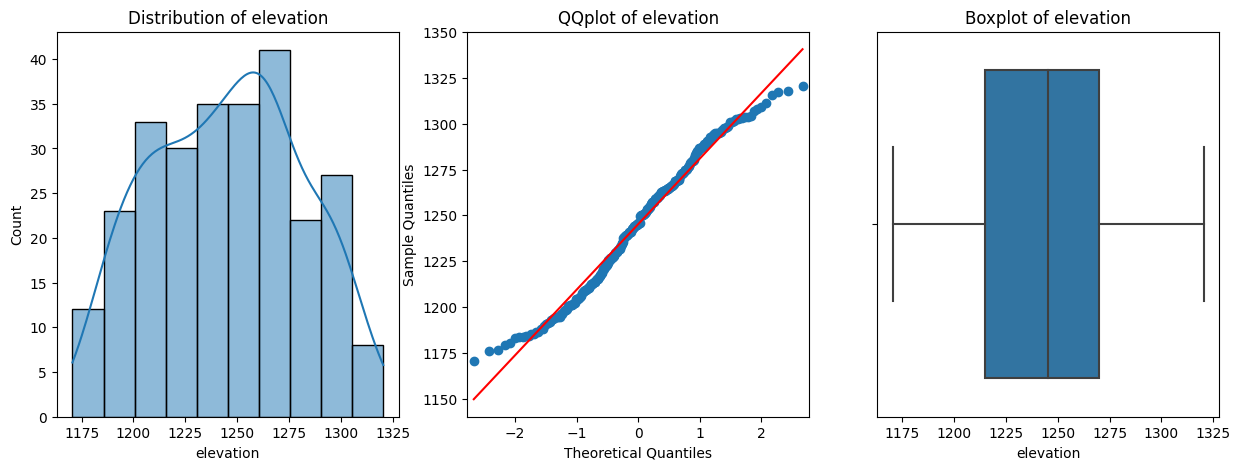

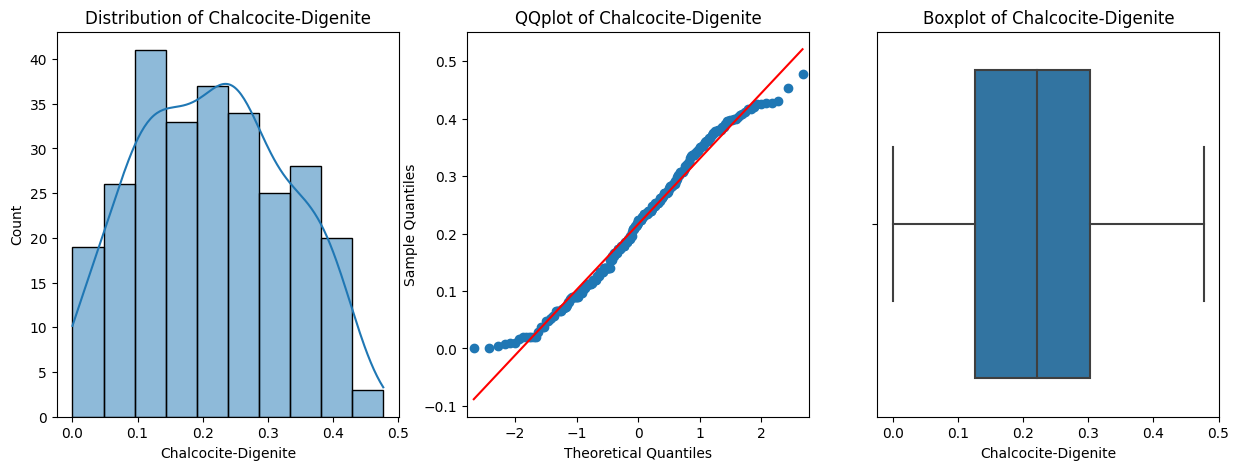

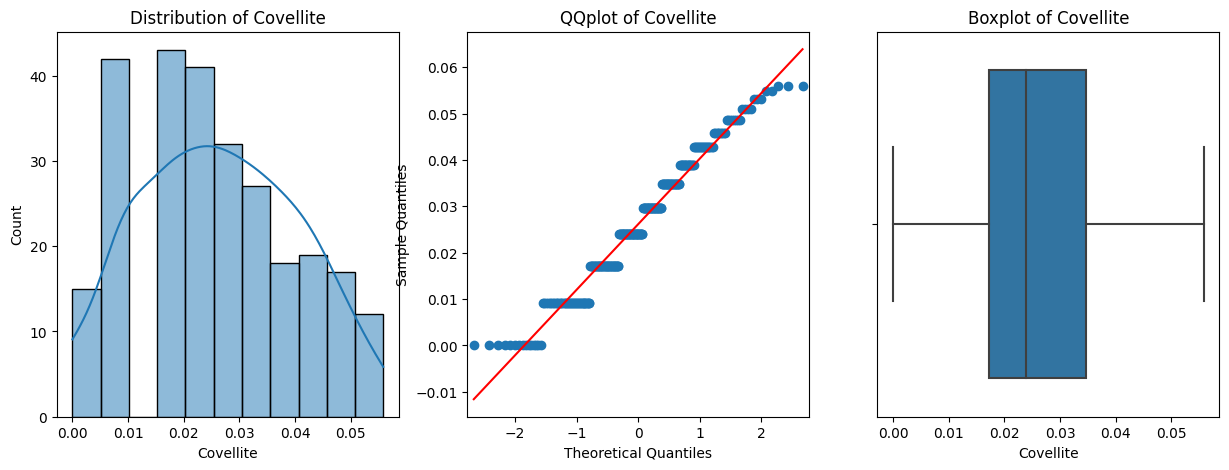

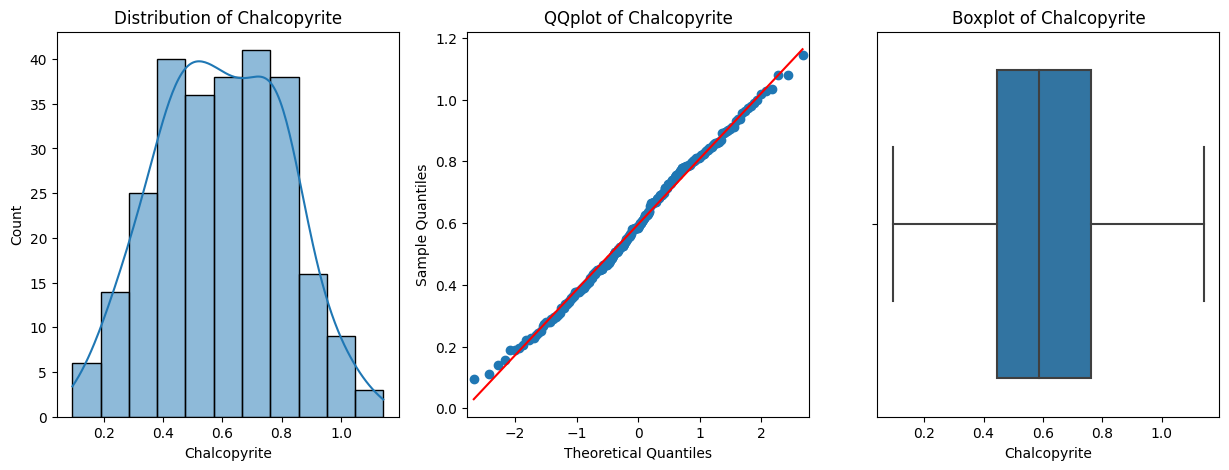

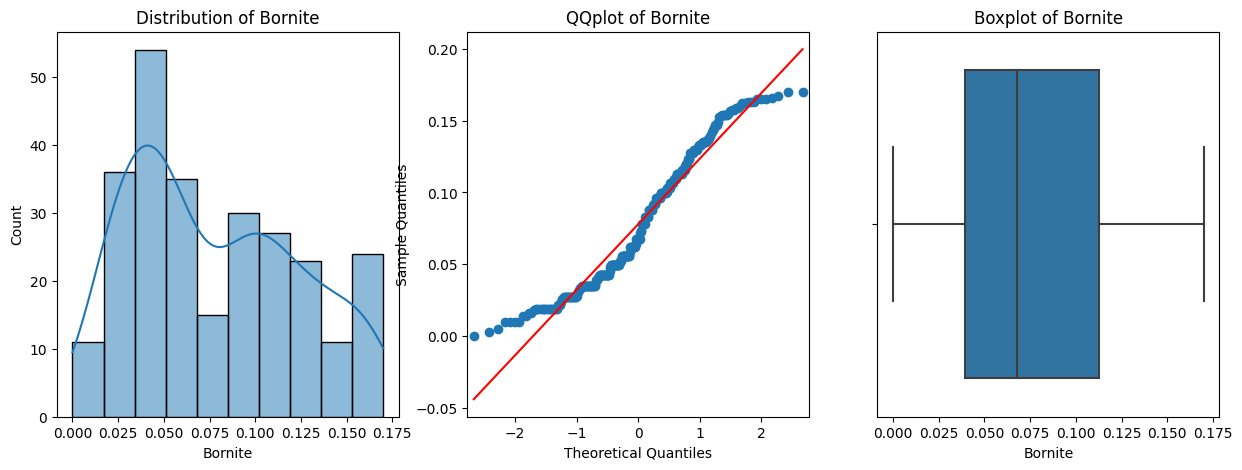

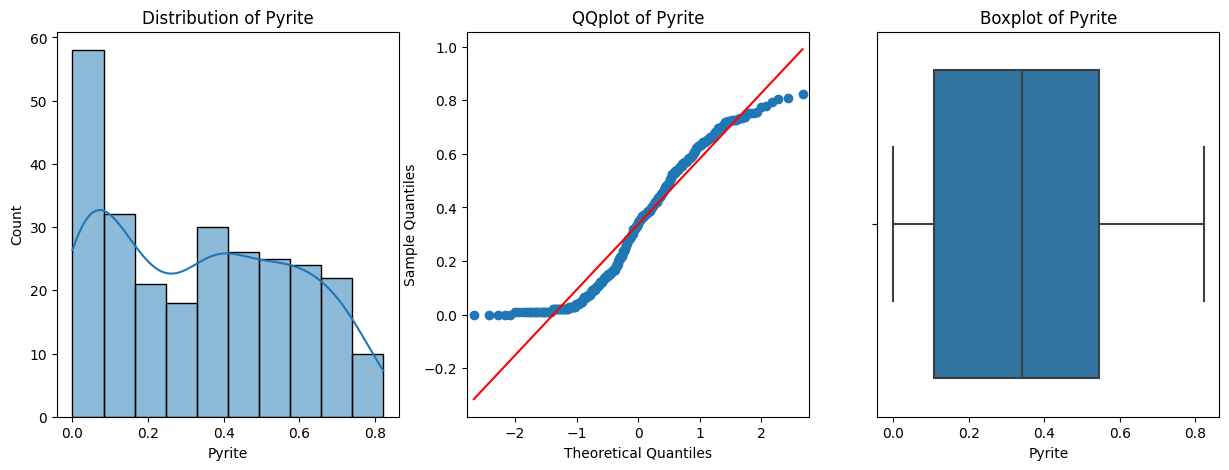

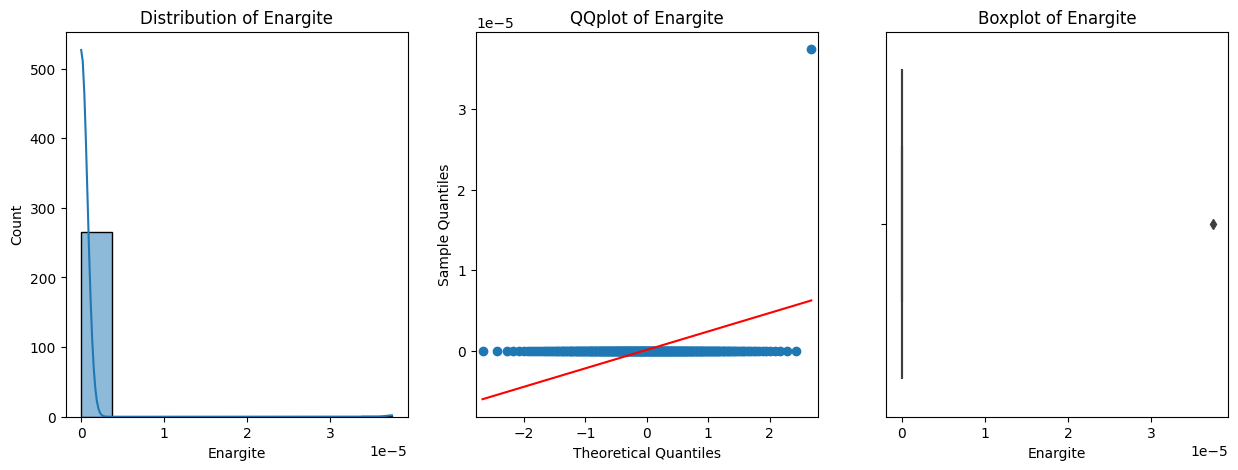

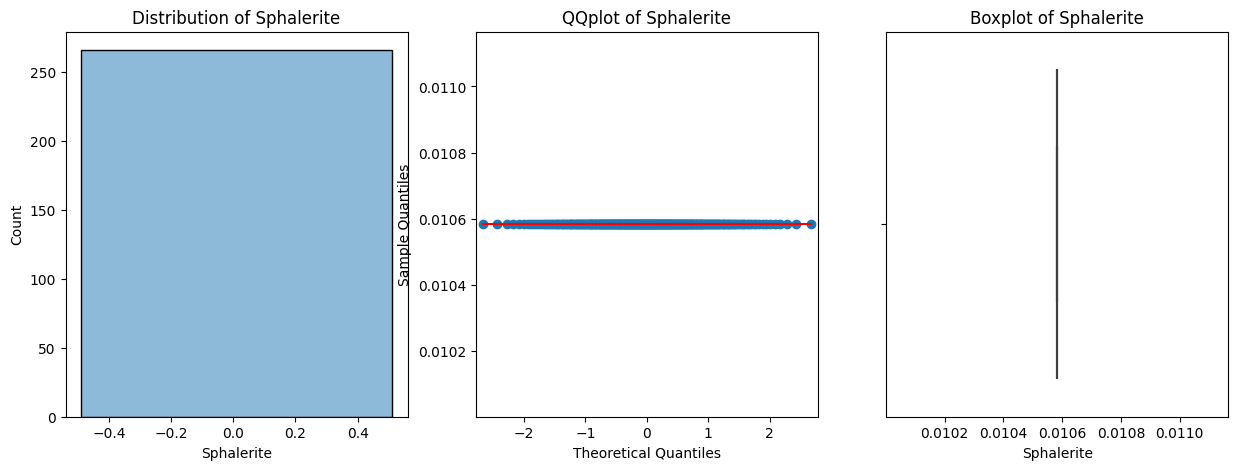

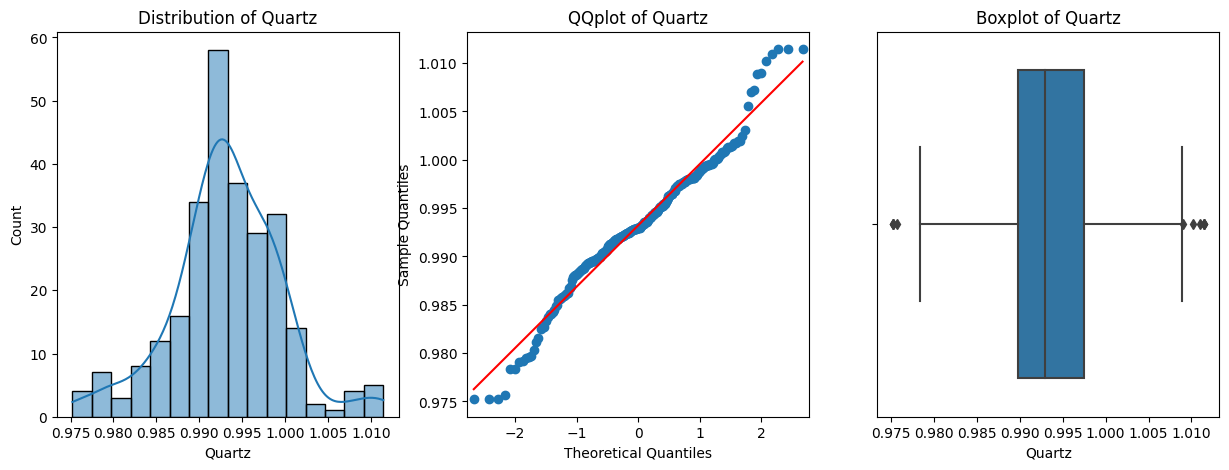

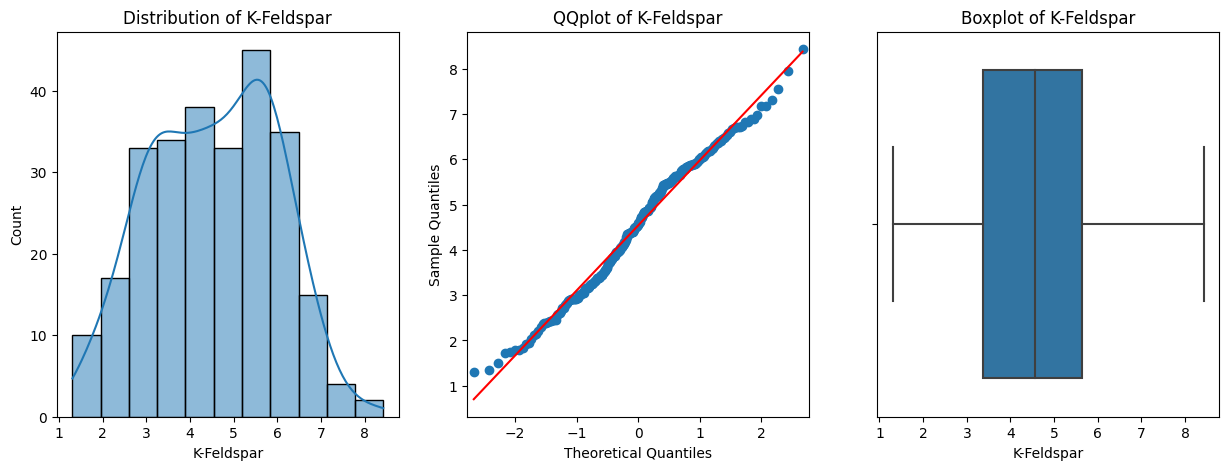

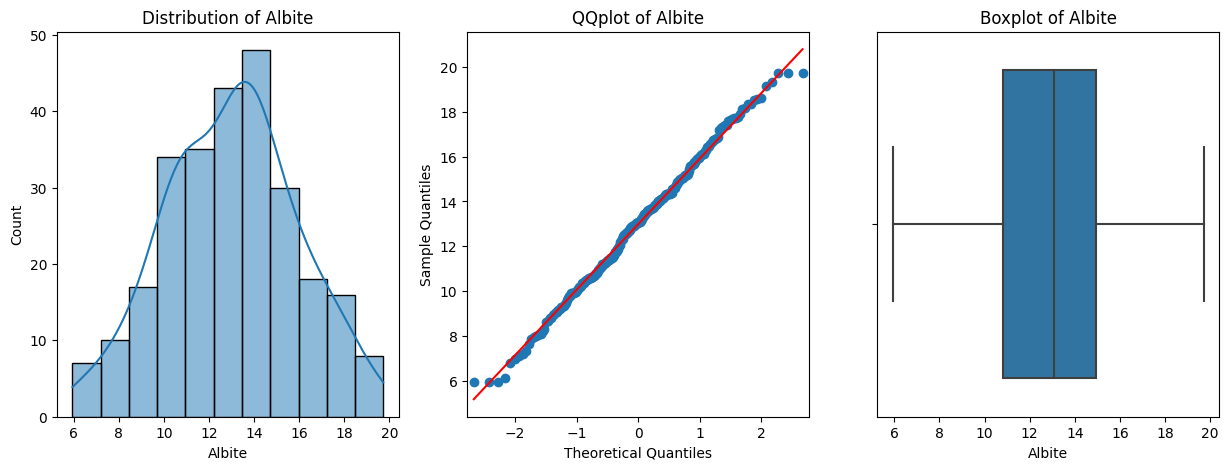

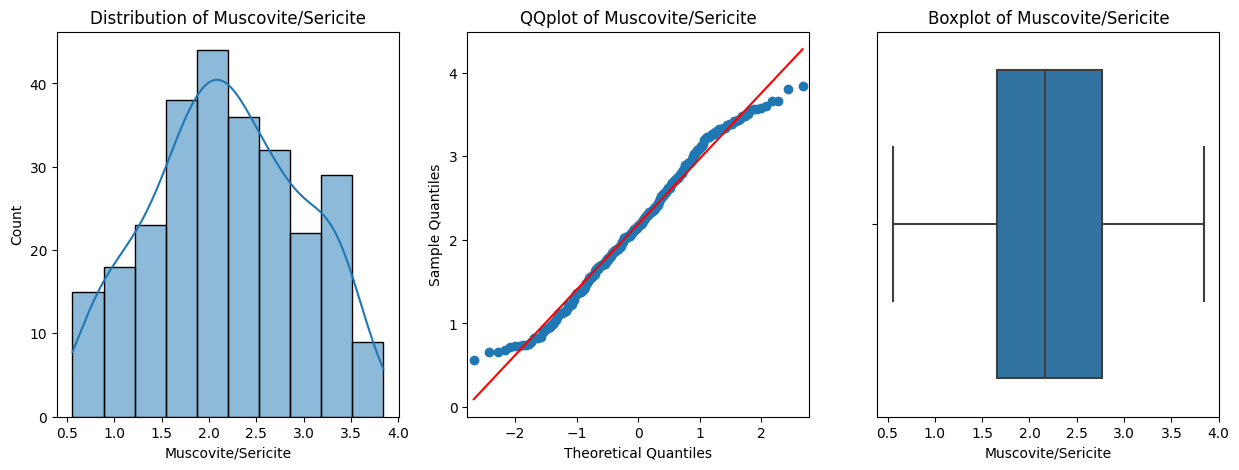

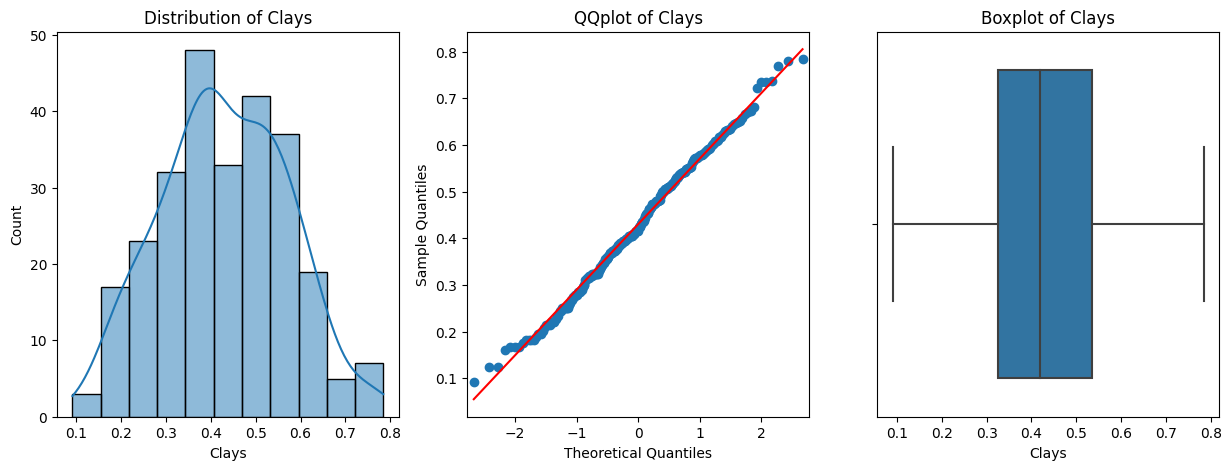

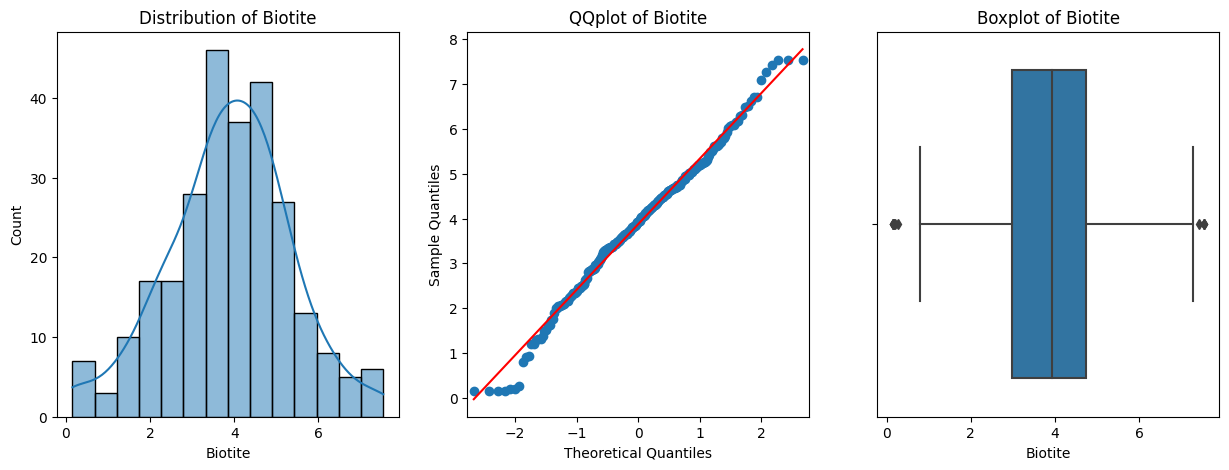

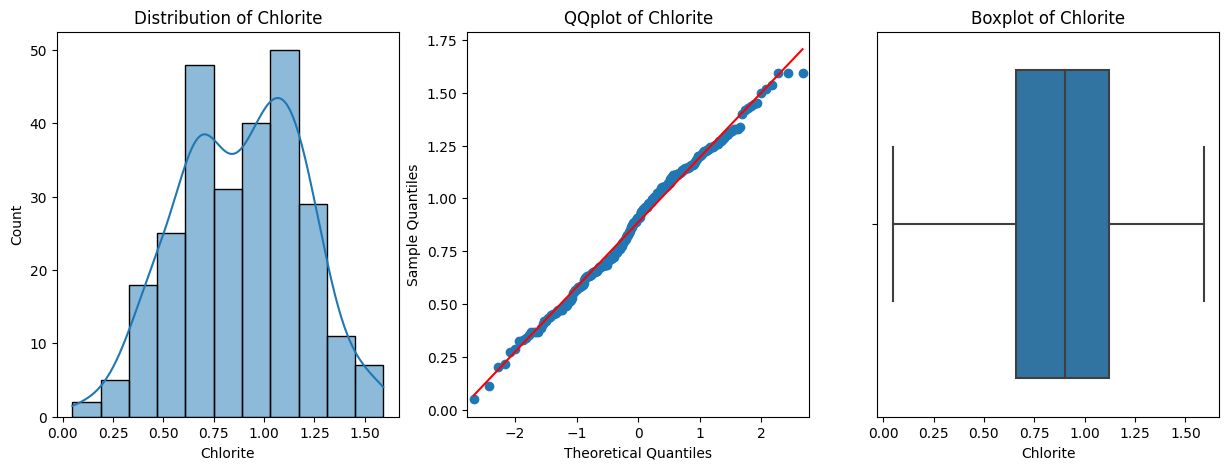

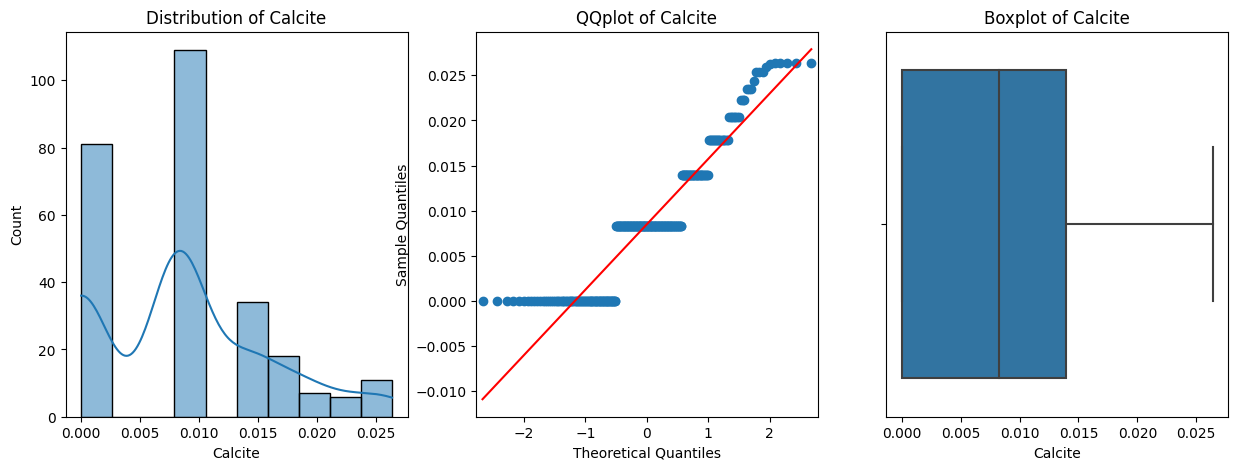

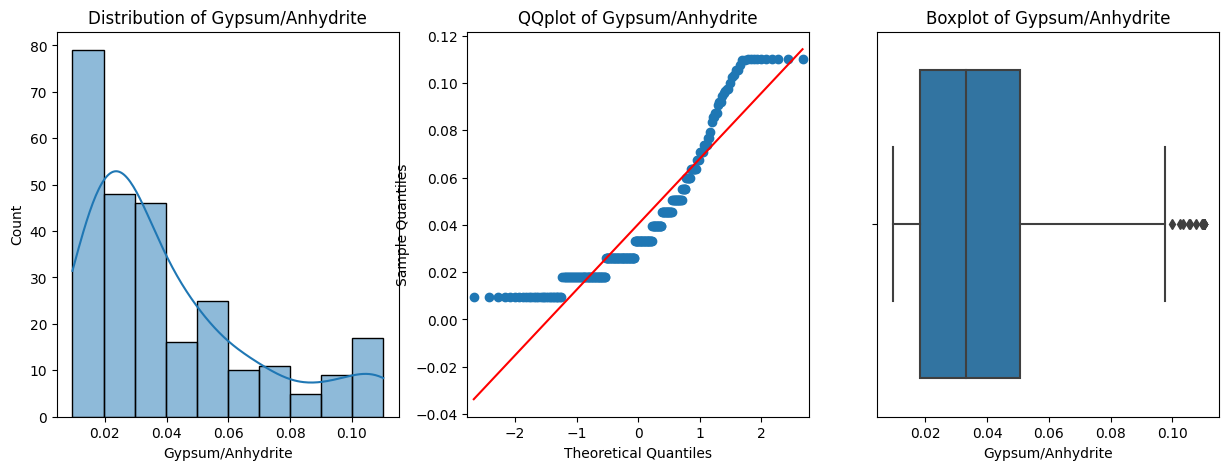

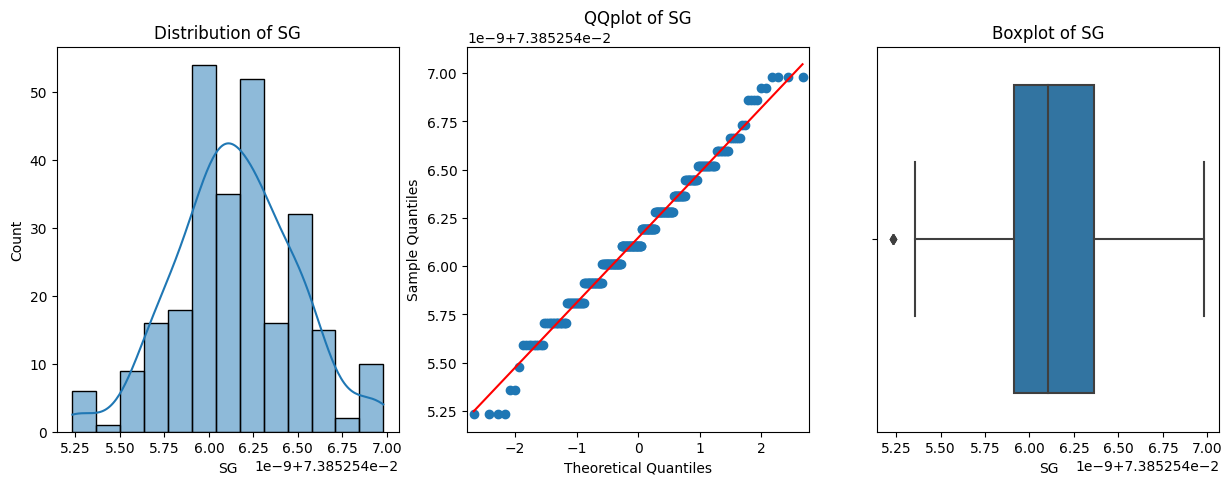

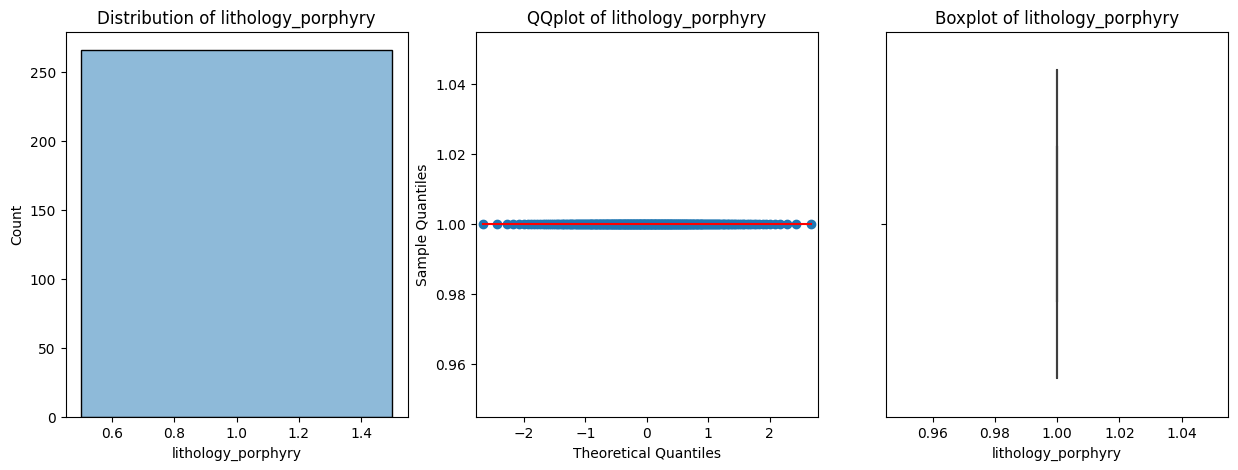

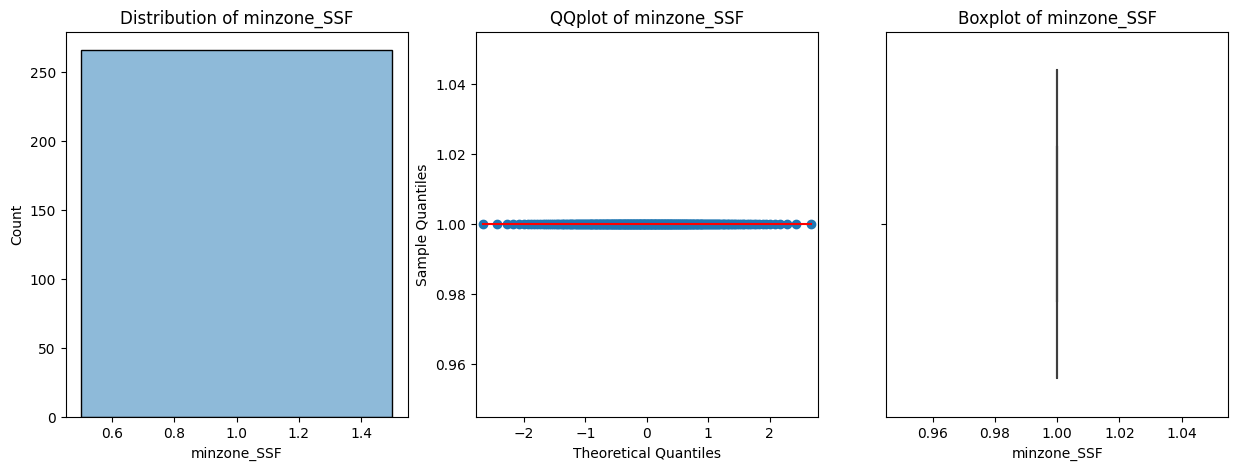

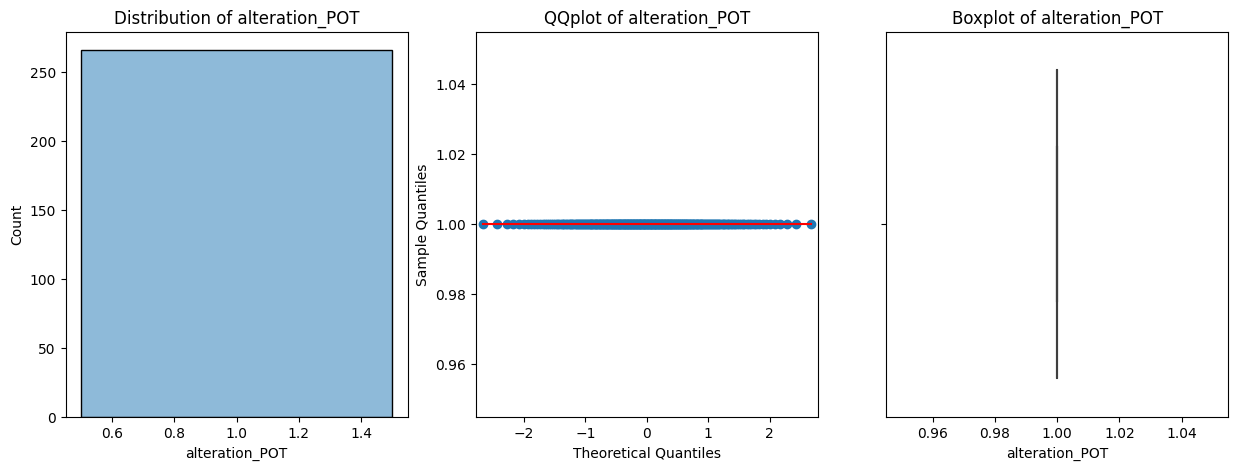

In [64]:
# Distribution of transformed variables
for feature in num_var_tf.columns:
    
    fig, ax = plt.subplots(1,3, figsize = (15,5))
    
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(x = num_var_tf[feature], kde = True, ax = ax[0])
    
    ax[1].set_title(f"QQplot of {feature}")
    qqplot(num_var_tf[feature], line='s', ax = ax[1])
    
        
    ax[2].set_title(f"Boxplot of {feature}")
    sns.boxplot(x = num_var_tf[feature], ax = ax[2])

## Feature scaling

In [65]:
X_train.round(2)

midx        midy     midz    East       North  elevation  \
463  198.25  4106758.55  1245.29  198.25  4106758.55    1245.29   
327  316.63  2733884.59  1245.89  316.63  2733884.59    1245.89   
340  312.72  2723339.99  1245.22  312.72  2723339.99    1245.22   
326  316.63  2733884.59  1245.89  316.63  2733884.59    1245.89   
179  214.09  3574069.11  1231.41  214.09  3574069.11    1231.41   
..      ...         ...      ...     ...         ...        ...   
368  265.30  3726965.44  1229.85  265.30  3726965.44    1229.85   
420  206.63  3488070.03  1186.26  206.63  3488070.03    1186.26   
237  331.77  3699111.03  1292.55  331.77  3699111.03    1292.55   
400  244.25  3071099.92  1176.71  244.25  3071099.92    1176.71   
202  329.75  3755615.52  1290.50  329.75  3755615.52    1290.50   

     Chalcocite-Digenite  Covellite  Chalcopyrite  Bornite  ...  \
463                 0.27       0.03          0.61     0.06  ...   
327                -0.00      -0.00          0.81    -0.00  ...   
340                 0.01      -0.00          0.99     0.01  ...   
326                -0.00      -0.00          0.91     0.01  ...   
179                 0.35       0.02          0.38     0.03  ...   
..                   ...        ...           ...      ...  ...   
368                 0.17       0.02          0.79     0.06  ...   
420                 0.23       0.02          0.53     0.06  ...   
237                 0.22       0.04          0.59     0.13  ...   
400                 0.02      -0.00          0.76     0.13  ...   
202                 0.18       0.02          0.70     0.07  ...   

     Muscovite/Sericite  Clays  Biotite  Chlorite  Calcite  Gypsum/Anhydrite  \
463                2.14   0.41     3.95      1.33    -0.00              0.03   
327                2.93   0.23     2.83      1.01     0.03              0.11   
340                2.72   0.22     3.36      1.02    -0.00              0.02   
326                2.96   0.21     2.52      0.96     0.03              0.11   
179                2.63   0.47     4.43      1.05    -0.00              0.01   
..                  ...    ...      ...       ...      ...               ...   
368                1.81   0.55     3.60      0.75     0.01              0.03   
420                2.89   0.30     4.75      0.88     0.01              0.05   
237                1.55   0.31     5.63      1.17    -0.00              0.05   
400                1.56   0.37     6.09      0.37     0.02              0.09   
202                1.78   0.66     2.25      1.26    -0.00              0.01   

       SG  lithology_porphyry  minzone_SSF  alteration_POT  
463  0.07                   1            1               1  
327  0.07                   1            1               1  
340  0.07                   1            1               1  
326  0.07                   1            1               1  
179  0.07                   1            1               1  
..    ...                 ...          ...             ...  
368  0.07                   1            1               1  
420  0.07                   1            1               1  
237  0.07                   1            1               1  
400  0.07                   1            1               1  
202  0.07                   1            1               1  

[266 rows x 26 columns]

**Comment:**
    numerical variables with different scale. This could lead to some problems, in particular for linear regression models. Scaling will be required.

**Comment:** enargite and sphalerite are removed from outlier removal
for being constant or quasi-constant variables.

### Feature scaling

**Comment:** Feature scaling is conducting with scikit-learn. This returns an array, then it is necessary to change the transformed database into a Pandas dataframe.

In [66]:
# Set up (instantiate) the scaler
scaler = RobustScaler()

In [67]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

RobustScaler()

In [68]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Transforming the returned NumPy arrays into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [70]:
X_train_scaled.head()

midx      midy      midz      East     North  elevation  \
0 -0.787033  1.339454 -0.003704 -0.787033  1.339454  -0.003704   
1  0.401537 -1.956969  0.007161  0.401537 -1.956969   0.007161   
2  0.362267 -1.982288 -0.005096  0.362267 -1.982288  -0.005096   
3  0.401537 -1.956969  0.007161  0.401537 -1.956969   0.007161   
4 -0.627966  0.060408 -0.257359 -0.627966  0.060408  -0.257359   

   Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
0             0.290225   0.614431      0.072253 -0.130067  ...   
1            -1.253217  -1.362864      0.704116 -0.928864  ...   
2            -1.197124  -1.362864      1.274349 -0.796484  ...   
3            -1.253217  -1.362864      1.032505 -0.796484  ...   
4             0.749530  -0.385569     -0.669965 -0.556916  ...   

   Muscovite/Sericite     Clays   Biotite  Chlorite   Calcite  \
0           -0.026790 -0.043630  0.010595  0.913255 -0.595125   
1            0.687432 -0.905523 -0.624363  0.228084  1.298992   
2            0.497415 -0.934811 -0.320582  0.259963 -0.595125   
3            0.715241 -0.964540 -0.799034  0.112752  1.298526   
4            0.418412  0.259832  0.281748  0.322377 -0.595125   

   Gypsum/Anhydrite        SG  lithology_porphyry  minzone_SSF  alteration_POT  
0          0.000000 -1.130392                 0.0          0.0             0.0  
1          2.380351  1.809992                 0.0          0.0             0.0  
2         -0.458618  0.199647                 0.0          0.0             0.0  
3          2.380351  1.676318                 0.0          0.0             0.0  
4         -0.724096  1.085203                 0.0          0.0             0.0  

[5 rows x 26 columns]

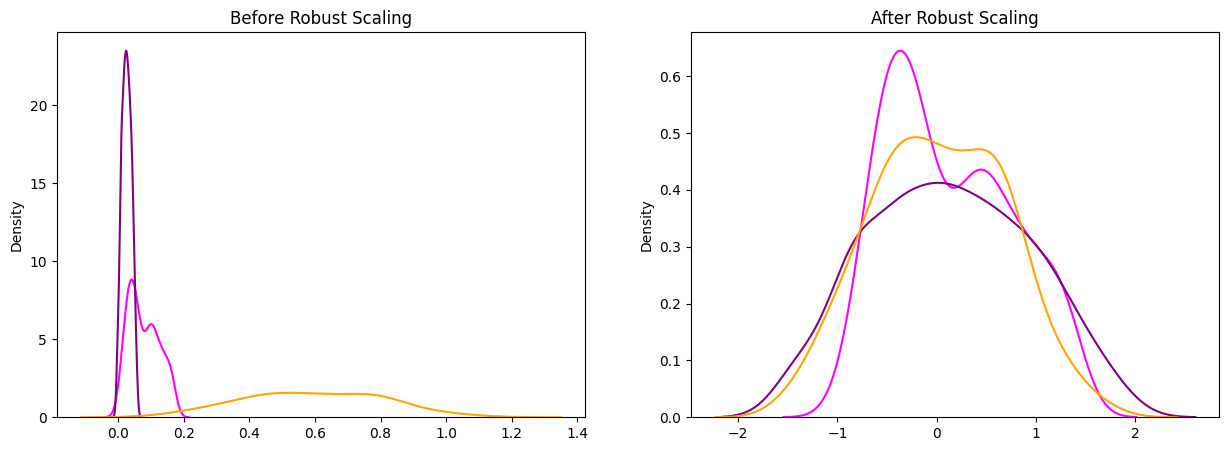

In [71]:
# Comparing variable distributions before and after scaling

fig, ax = plt.subplots(1,2, figsize = (15,5))

# before scaling
ax[0].set_title('Before Robust Scaling')
sns.kdeplot(data=X_train['Bornite'], ax=ax[0], color='magenta')
sns.kdeplot(data=X_train['Covellite'], ax=ax[0], color='purple')
sns.kdeplot(data=X_train['Chalcopyrite'], ax=ax[0], color='orange')

# after scaling
ax[1].set_title('After Robust Scaling')
sns.kdeplot(data=X_train_scaled['Bornite'], ax=ax[1], color='magenta')
sns.kdeplot(data=X_train_scaled['Covellite'], ax=ax[1], color='purple')
sns.kdeplot(data=X_train_scaled['Chalcopyrite'], ax=ax[1], color='orange')

ax[0].set(xlabel=None)
ax[1].set(xlabel=None)

plt.show()

In [72]:
# Finally, changing the working database
X_train = X_train_scaled
X_test = X_test_scaled

In [73]:
X_train

midx      midy      midz      East     North  elevation  \
0   -0.787033  1.339454 -0.003704 -0.787033  1.339454  -0.003704   
1    0.401537 -1.956969  0.007161  0.401537 -1.956969   0.007161   
2    0.362267 -1.982288 -0.005096  0.362267 -1.982288  -0.005096   
3    0.401537 -1.956969  0.007161  0.401537 -1.956969   0.007161   
4   -0.627966  0.060408 -0.257359 -0.627966  0.060408  -0.257359   
..        ...       ...       ...       ...       ...        ...   
261 -0.113903  0.427529 -0.285804 -0.113903  0.427529  -0.285804   
262 -0.702924 -0.146086 -1.081805 -0.702924 -0.146086  -1.081805   
263  0.553464  0.360647  0.859451  0.553464  0.360647   0.859451   
264 -0.325155 -1.147278 -1.256378 -0.325155 -1.147278  -1.256378   
265  0.533184  0.496321  0.821878  0.533184  0.496321   0.821878   

     Chalcocite-Digenite  Covellite  Chalcopyrite   Bornite  ...  \
0               0.290225   0.614431      0.072253 -0.130067  ...   
1              -1.253217  -1.362864      0.704116 -0.928864  ...   
2              -1.197124  -1.362864      1.274349 -0.796484  ...   
3              -1.253217  -1.362864      1.032505 -0.796484  ...   
4               0.749530  -0.385569     -0.669965 -0.556916  ...   
..                   ...        ...           ...       ...  ...   
261            -0.307938   0.000000      0.628064 -0.162478  ...   
262             0.072225  -0.385569     -0.193879 -0.162478  ...   
263             0.014771   1.068699     -0.008135  0.894150  ...   
264            -1.142378  -1.362864      0.536476  0.815172  ...   
265            -0.204403   0.000000      0.343228  0.000000  ...   

     Muscovite/Sericite     Clays   Biotite  Chlorite   Calcite  \
0             -0.026790 -0.043630  0.010595  0.913255 -0.595125   
1              0.687432 -0.905523 -0.624363  0.228084  1.298992   
2              0.497415 -0.934811 -0.320582  0.259963 -0.595125   
3              0.715241 -0.964540 -0.799034  0.112752  1.298526   
4              0.418412  0.259832  0.281748  0.322377 -0.595125   
..                  ...       ...       ...       ...       ...   
261           -0.321015  0.612334 -0.185776 -0.346024  0.000000   
262            0.648787 -0.560900  0.461625 -0.063178  0.000000   
263           -0.558854 -0.489807  0.963945  0.583356 -0.595125   
264           -0.548947 -0.231562  1.221042 -1.168649  0.870876   
265           -0.349815  1.139907 -0.950362  0.760745 -0.595125   

     Gypsum/Anhydrite        SG  lithology_porphyry  minzone_SSF  \
0            0.000000 -1.130392                 0.0          0.0   
1            2.380351  1.809992                 0.0          0.0   
2           -0.458618  0.199647                 0.0          0.0   
3            2.380351  1.676318                 0.0          0.0   
4           -0.724096  1.085203                 0.0          0.0   
..                ...       ...                 ...          ...   
261         -0.218104  1.676318                 0.0          0.0   
262          0.377829  0.752242                 0.0          0.0   
263          0.541382 -0.650234                 0.0          0.0   
264          1.623687  0.391347                 0.0          0.0   
265         -0.724096  0.922065                 0.0          0.0   

     alteration_POT  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
..              ...  
261             0.0  
262             0.0  
263             0.0  
264             0.0  
265             0.0  

[266 rows x 26 columns]

# Feature selection

## Removing constant, quasi-constant and duplicated features

In [74]:
pipe = Pipeline([
    ('Constant', DropConstantFeatures(tol=0.99)),
    ('Duplicated', DropDuplicateFeatures())
])

In [75]:
pipe.fit(X_train)

Pipeline(steps=[('Constant', DropConstantFeatures(tol=0.99)),
                ('Duplicated', DropDuplicateFeatures())])

In [76]:
X_train.shape

(266, 26)

In [77]:
X_train.columns

Index(['midx', 'midy', 'midz', 'East', 'North', 'elevation',
       'Chalcocite-Digenite', 'Covellite', 'Chalcopyrite', 'Bornite', 'Pyrite',
       'Enargite', 'Sphalerite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG', 'lithology_porphyry', 'minzone_SSF',
       'alteration_POT'],
      dtype='object')

In [78]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [79]:
X_train.shape

(266, 18)

In [80]:
X_train.columns

Index(['midx', 'midy', 'midz', 'Chalcocite-Digenite', 'Covellite',
       'Chalcopyrite', 'Bornite', 'Pyrite', 'Quartz', 'K-Feldspar', 'Albite',
       'Muscovite/Sericite', 'Clays', 'Biotite', 'Chlorite', 'Calcite',
       'Gypsum/Anhydrite', 'SG'],
      dtype='object')

## Recursive Feature Elimination (SFE)

In [81]:
# Building initial model using all the features
model = RandomForestRegressor(n_estimators=100,
                          max_depth=3,
                          random_state=1,
                          n_jobs=4)

In [82]:
# Setup the RFE selector
sel = RecursiveFeatureElimination(
    variables=None, # automatically evaluate all numerical variables
    estimator = model, # the ML model
    scoring = 'r2', # metric for evaluating
    threshold = 0.001, #  maximum performance drop allowed to remove a feature
    cv=3, # cross-validation
)

In [83]:
y_train = pd.DataFrame(y_train, columns=['Ai'])

In [84]:
# this may take quite a while, because
# we are building a lot of models with cross-validation
sel.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RecursiveFeatureElimination(estimator=RandomForestRegressor(max_depth=3,
                                                            n_jobs=4,
                                                            random_state=1),
                            scoring='r2', threshold=0.001)

In [85]:
# performance of model trained using all features
sel.initial_model_performance_

0.5167241720691482

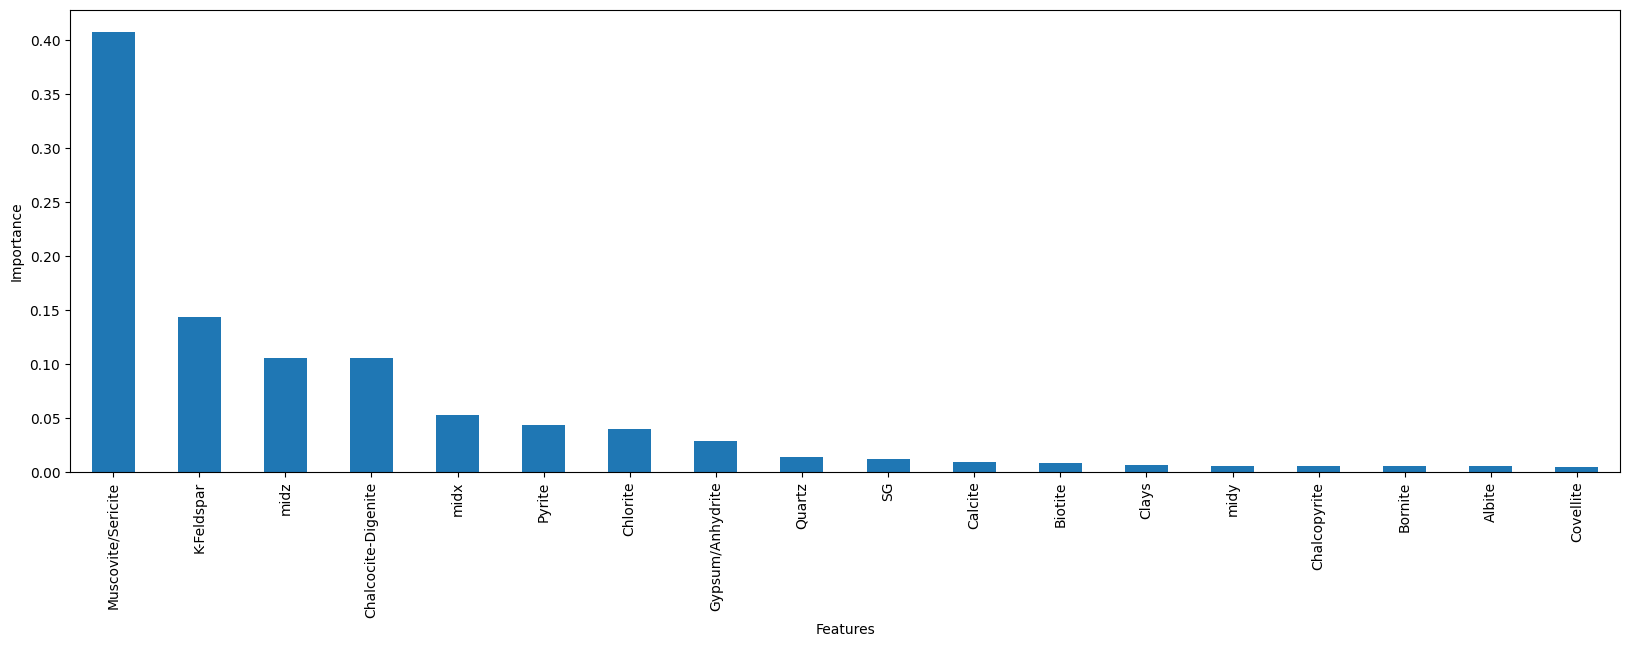

In [86]:
# importance of all features based of initial model
sel.feature_importances_.sort_values(ascending=False).plot.bar(figsize=(20,6))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [87]:
# Number of features that will be removed
len(sel.features_to_drop_)

7

In [88]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((266, 11), (67, 11))

In [89]:
X_train.columns

Index(['midx', 'midy', 'midz', 'Chalcocite-Digenite', 'Covellite',
       'Chalcopyrite', 'Bornite', 'K-Feldspar', 'Albite', 'Muscovite/Sericite',
       'Calcite'],
      dtype='object')

In [90]:
# # Performance of the model built on the selected features

# # fit the model with the selected features
# model.fit(X_train, y_train)

# # make predictions
# y_pred_test = model.predict(X_test)

# # calculate r2
# r2_final = r2_score(y_test, y_pred_test)


# print("R2 test sample:", round((r2_final),3))

**Comment**: The model built with 7 features shows similar or slightly better performance than the model estimated with the total 18 features.

In [91]:
# # Using our function for error reporting
# error_report(y_test,y_pred_test)

In [92]:
# # Predicted vs actual value visualization
# plt.scatter(y_test, y_pred_test)
# plt.xlabel('Actual Ai')
# plt.ylabel('Predicted Ai');

# Random Forest regression model

In [93]:
# GridsearchCV function will be used to conduct the hyperparameter tuning

# Instantiate the grid search model
rf = RandomForestRegressor(random_state=1)

param_grid = {
    'max_features': [3, 5, 7],
    'min_samples_leaf': [2, 3, 4],    
    'n_estimators': [30, 40, 50]
}

grid = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=10, verbose=1)

In [94]:
print("Number of hyperparameter combinations: ",
     len(param_grid['max_features'])
    *len(param_grid['min_samples_leaf'])
    *len(param_grid['n_estimators']))

Number of hyperparameter combinations:  27


In [95]:
# Fitting the grid
grid.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Asus\AppData\Local\Programs\Python

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_features': [3, 5, 7],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [30, 40, 50]},
             verbose=1)

In [96]:
# results = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score']]
# print(results.shape)
# results

In [115]:
# Printing the best parameters
print(f"The best parameters are {grid.best_params_}")

The best parameters are {'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 30}


In [116]:
# Printing the best parameters
# print(f"The best parameters are {grid.best_params_} with a score of {grid.best_score_:.3f}")

In [98]:
# Instantiating the random forest model
rf_model = RandomForestRegressor(max_features=5, min_samples_leaf=2, n_estimators=30, random_state=1)

In [99]:
# Fitting the model
rf_model.fit(X_train, y_train)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10832\431679229.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestRegressor(max_features=5, min_samples_leaf=2, n_estimators=30,
                      random_state=1)

In [100]:
# Prediction of the Ai in the test dataset
y_pred_rf = rf_model.predict(X_test)

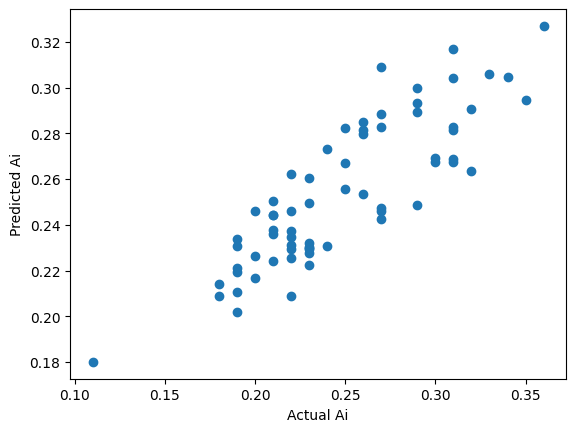

In [101]:
# Predicted vs actual value visualization
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Ai')
plt.ylabel('Predicted Ai');

In [102]:
# Using our function for error reporting
error_report(y_test,y_pred_rf)

Model results:

RMSE test: 0.028
R2 test: 0.669


# Prediction of X_train (as an example)

In [103]:
# Export X_train as example
X_train.to_csv('Example.csv')

# Note: data already preprocessed. New data needs to be preprocessed!

In [104]:
example = pd.read_csv('Example.csv',index_col=[0])

In [105]:
example

midx      midy      midz  Chalcocite-Digenite  Covellite  \
0   -0.787033  1.339454 -0.003704             0.290225   0.614431   
1    0.401537 -1.956969  0.007161            -1.253217  -1.362864   
2    0.362267 -1.982288 -0.005096            -1.197124  -1.362864   
3    0.401537 -1.956969  0.007161            -1.253217  -1.362864   
4   -0.627966  0.060408 -0.257359             0.749530  -0.385569   
..        ...       ...       ...                  ...        ...   
261 -0.113903  0.427529 -0.285804            -0.307938   0.000000   
262 -0.702924 -0.146086 -1.081805             0.072225  -0.385569   
263  0.553464  0.360647  0.859451             0.014771   1.068699   
264 -0.325155 -1.147278 -1.256378            -1.142378  -1.362864   
265  0.533184  0.496321  0.821878            -0.204403   0.000000   

     Chalcopyrite   Bornite  K-Feldspar    Albite  Muscovite/Sericite  \
0        0.072253 -0.130067   -0.071895  1.133197           -0.026790   
1        0.704116 -0.928864   -0.312586 -0.395056            0.687432   
2        1.274349 -0.796484   -0.223550 -0.514050            0.497415   
3        1.032505 -0.796484   -0.453709 -0.413245            0.715241   
4       -0.669965 -0.556916   -0.956899 -0.658945            0.418412   
..            ...       ...         ...       ...                 ...   
261      0.628064 -0.162478    0.388282  0.087180           -0.321015   
262     -0.193879 -0.162478   -0.714445 -1.014989            0.648787   
263     -0.008135  0.894150    0.153339  0.742239           -0.558854   
264      0.536476  0.815172    0.133021  0.705593           -0.548947   
265      0.343228  0.000000    0.321307  0.515864           -0.349815   

      Calcite  
0   -0.595125  
1    1.298992  
2   -0.595125  
3    1.298526  
4   -0.595125  
..        ...  
261  0.000000  
262  0.000000  
263 -0.595125  
264  0.870876  
265 -0.595125  

[266 rows x 11 columns]

In [106]:
# Prediction of the Ai in the test dataset
y_pred_rf = rf_model.predict(example)

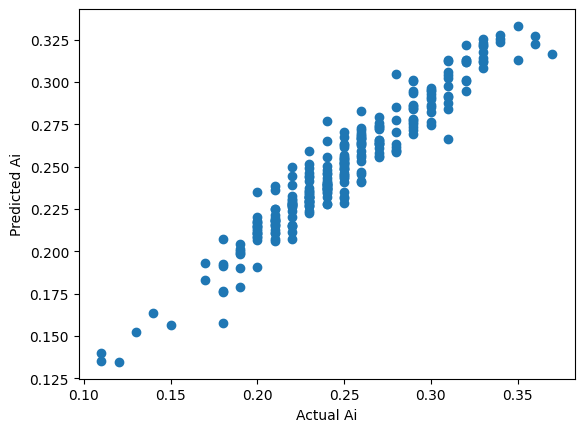

In [107]:
# Predicted vs actual value visualization
plt.scatter(y_train, y_pred_rf)
plt.xlabel('Actual Ai')
plt.ylabel('Predicted Ai');

In [108]:
# Using our function for error reporting
error_report(y_train,y_pred_rf)

Model results:

RMSE test: 0.014
R2 test: 0.91


In [109]:
# we also find the data for all models evaluated

results = pd.DataFrame(grid.cv_results_)

print(results.shape)

results.head()

(27, 21)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.027148      0.003563         0.002320        0.000490   
1       0.033862      0.000738         0.002369        0.000393   
2       0.042393      0.000742         0.003373        0.000441   
3       0.024656      0.000474         0.002362        0.000560   
4       0.032523      0.000586         0.002519        0.000436   

  param_max_features param_min_samples_leaf param_n_estimators  \
0                  3                      2                 30   
1                  3                      2                 40   
2                  3                      2                 50   
3                  3                      3                 30   
4                  3                      3                 40   

                                              params  split0_test_score  \
0  {'max_features': 3, 'min_samples_leaf': 2, 'n_...           0.272750   
1  {'max_features': 3, 'min_samples_leaf': 2, 'n_...           0.305300   
2  {'max_features': 3, 'min_samples_leaf': 2, 'n_...           0.307874   
3  {'max_features': 3, 'min_samples_leaf': 3, 'n_...           0.261414   
4  {'max_features': 3, 'min_samples_leaf': 3, 'n_...           0.286139   

   split1_test_score  ...  split3_test_score  split4_test_score  \
0           0.705753  ...           0.639608           0.561571   
1           0.714276  ...           0.614634           0.555628   
2           0.712127  ...           0.614358           0.554101   
3           0.682570  ...           0.568957           0.538424   
4           0.675251  ...           0.568535           0.559043   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.644299           0.527506           0.641414           0.688801   
1           0.644472           0.533284           0.634187           0.694145   
2           0.619059           0.546067           0.617108           0.705993   
3           0.604656           0.509009           0.572840           0.695215   
4           0.603393           0.530825           0.591518           0.695324   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.654878         0.585390        0.120770                6  
1           0.667711         0.587428        0.113816                2  
2           0.673382         0.586822        0.111968                4  
3           0.730619         0.567755        0.125859               21  
4           0.731392         0.574936        0.118428               18  

[5 rows x 21 columns]

In [110]:
# let's make a function to evaluate the model performance based on
# single hyperparameters

def summarize_by_param(hparam):
    
    tmp = pd.concat([
        results.groupby(hparam)['mean_test_score'].mean(),
        results.groupby(hparam)['mean_test_score'].std(),
    ], axis=1)

    tmp.columns = ['mean_test_score', 'std_test_score']
    
    return tmp

In [111]:
# performance change for n_estimators

tmp = summarize_by_param('param_max_features')

tmp.head()

mean_test_score  std_test_score
param_max_features                                 
3                          0.572680        0.012352
5                          0.578351        0.009601
7                          0.576084        0.004481

Text(0, 0.5, 'r2')

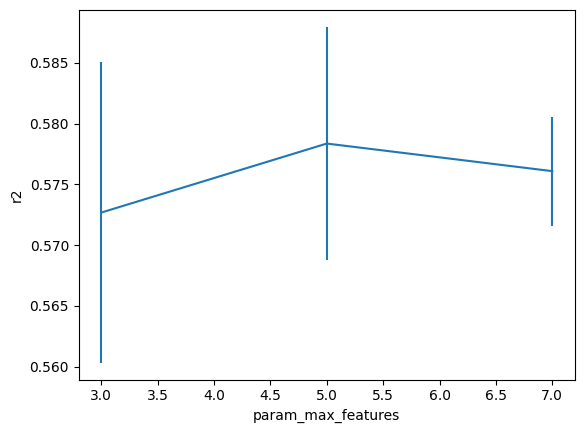

In [112]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('r2')

Text(0.5, 0, 'Hyperparameter combinations')

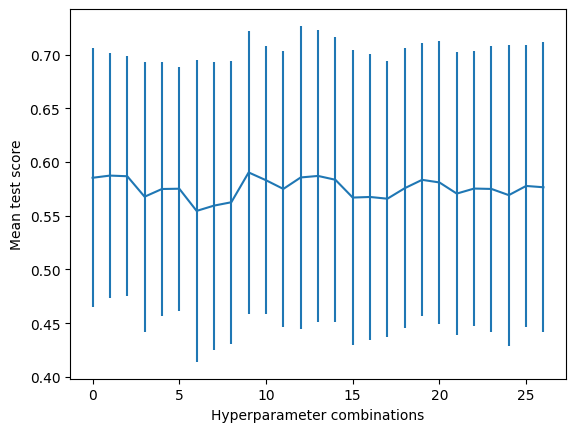

In [113]:
# plot model performance and error

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [114]:
###############################     END OF DATA PREPARATION & REGRESSION MODEL     #############################